In [1]:
# !pip install --upgrade plotly 

In [2]:
# Let's import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
# from pandas_profiling import ProfileReport
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import plot_roc_curve, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [3]:
# Style des graphiques seaborn
sns.set_theme(style = "whitegrid")

In [4]:
data_stroke = pd.read_csv("C:/Users/Papa Ba GAYE/Desktop/healthcare-dataset-stroke-data.csv")

In [5]:
data_frame = data_stroke.copy()


<div style="font-family: 'Times New Roman'" align="justify"><h1 align="center" class="alert alert-info">DEMARCHE DE TRAVAIL</h1>
<h2 align="center" class="alert alert-success">OBJECTIF MESURABLE</h2>
    <strong>OBJECTIF</strong>
<p>Prédire si une personne est atteinte d'un accident vasculaire cérébral ou pas à partir des données personnelles et cliniques fournies (problème de classification). Il est essentiel de noter qu'il est plus urgent, dans ce cas de figure, de détecter toutes les personnes malades (et non ceux qui sont vraiment malades parmi ceux qui sont identifiés comme malade). Sinon un patient malade peut être diagnostiquer comme sain alors que ce n'est pas le cas. Nous préférerons ainsi la sensibilité/spécificité à la précision.</p></li><hr size = "2">
    <strong>METRIQUE ET SCORE A ATTEINDRE</strong> 
<p>La proportion de la classe positive est largement inférieure à la proportion de la classe négative (nous notons une forte déséquilibre de classes). Dans ce cas de figure, la métrique accuracy ne sera pas assez performante pour évaluer notre modèle de classification. A la place, nous allons utiliser les métriques sensibilité et précision pour valider notre modèle :</p>
<ul>
    <li>Sensibilité : $\frac{VP}{VP+FN}$. Elle permet de calculer le pourcentage de tests positifs parmi les patients réellement atteints d'AVC ;</li>
    <li>Spécificité : $\frac{VN}{VN+FP}$. Elle permet de calculer le pourcentage de tests négatifs parmi les patients réellement sains. C'est la sensibilité pour les test négatifs ;</li>
    <li>Précision : $\frac{VP}{VP+FP}$. Elle permet de calculer le pourcentage de patients réellement malades parmi ceux dont le test est positif ;</li>
    <li>F1-score : $\frac{2\times Sensibilite \times Precision}{Sensibilite+Precision}$ ;</li>
    <li>
        Avec :
        <ul>
            <li>$VP$ : Nombre de Vrais Positifs ;</li>
            <li>$VN$ : Nombre de Vrais Négatifs ;</li>
            <li>$FN$ : Nombre de Faux Négatifs ;</li>
            <li>$FP$ : Nombre de Faux Positifs ;</li>
        </ul>
    </li>
 </ul>   
<p>Nous nous fixons une sensibilité/spécificité supérieure à <strong>80%</strong>. Nous pouvons également utiliser des outils supplémentaires comme <strong>les courbes ROC et Precision-Recall</strong> pour affiner nos choix de performance.</p>
<h2 align="center" class="alert alert-success">EXPLORATION DES DONNEES</h2>
<h3 align="center" class="alert alert-warning" style="color:darkorange">ANALYSE DE LA FORME</h3>
<strong>CIBLE</strong>
<p>La variable dépendante est la variable <strong>stroke</strong> qui contient des données discrètes. Cette variable indique si une personne est atteinte d'un accident vasculaire cérébral (1 pour atteinte) ou pas (0 pour non atteinte). Nous allons abréger, par la suite, accident vasculaire cérébral par AVC pour faciliter l'écrit. Nous devons transformer, plus tard, la variable cible en variable catégorielle non ordinale (cela nous permettra de différencier la catégorie "être atteint(e) d'AVC" de la catégorie "être non atteint(e) d'AVC"). Nous devrons ainsi utiliser un modèle de classification (classification model) pour déterminer si un patient est malade ou sain.</p>
<hr size="2">
<strong>NOMBRE DE LIGNES ET DE COLONNES</strong> 
<p>Nous avons identifié 5110 observations et 12 variables (dont la cible). Le nombre d'observations est inférieur à 10000, donc notre dataset ne contient pas énormément d'observations mais assez pour entraîner un modèle.</p>
<hr size="2">
<strong>TYPES DE VARIABLES</strong>
<p>Parmi les variables explicatives, nous avons identifié 7 variables catégorielles (dont deux contiennent des valeurs discrètes et les autres contiennent des valeurs de type chaîne de caractères) et 3 variables non catégorielles.</p>
<ul>
    <li>
        Les variables de type object ont pour valeurs possibles les suivantes :
        <ul>
            <li><strong>gender</strong> (genre) : contient les valeurs <i>Male</i> (Homme), <i>Female</i> (Femelle) ou <i>Other</i> (ni Homme, ni Femme) ;</li>
            <li><strong>ever_married</strong> (jamais marié(e)) : peut prendre les valeurs <i>Yes</i> (Oui) ou <i>No</i> (Non) ;</li>
            <li><strong>work_type</strong> (type de travail) : peut prendre les valeurs <i>Private</i> (Privée), <i>Self_employed</i> (Auto emploi ou Travail autonome), <i>Govt_job</i> (Travail au gouvernement), <i>children</i> (enfant), <i>Never_worked</i> (N'a jamais travaillé(e)) ;</li>
            <li><strong>Residence_type</strong> (type de résidence) : peut prendre les valeurs <i>Urban</i> (Urbaine), <i>Rural</i> (Rurale) ;</li>
            <li><strong>smoking_status</strong> (statut de fumeur) : contient les valeurs <i>formerly_smoked</i> (a fumé(e) dans le passé), <i>never_smoke</i> (n'a jamais fumé), <i>smokes</i> (fume), <i>Unknow</i> (donnée non recueillie).</li>
        </ul>
    </li>
    <li>Quant aux variables catégorielles <strong>hypertension</strong> et <strong>heart_disease</strong> (maladie de coeur), elles peuvent prendre les valeurs 1 (pour <i>positive</i>) ou 0 (pour <i>négative</i>). </li>
    <li>Nous identifions une variable discrète non categorielle (<strong>age</strong>) dont les valeurs varient de 0.08 (enfant de 9 mois) à 82 (adulte de 82 ans). Sa valeur moyenne est de 43 (adulte de 43 ans).</li>
    <li>
        Le dataset ne contient que deux variables continues, <strong>avg_glucose_level</strong> (niveau moyen de glucose dans le sang) et <strong>bmi</strong> (indice de masse corporelle). Ces deux variables ne s'expriment pas avec les mêmes unités :
        <ul>
            <li>La variable avg_glucose_level a pour valeur maximale 271.74 et pour valeur minimale 55.12. Sa valeur moyenne est de 106.15.</li>
            <li>La variable bmi a pour valeur maximale 97.60 et pour valeur minimale 10.30. Sa valeur moyenne est 28.89.</li>
        </ul>
    </li>
    <li>Nous définirons plus en détail ces variables dans la partie analyse du fond.</li>
</ul>
<hr size="2">
<strong>IDENTIFICATION DES VALEURS MANQUANTES</strong>
<p>Nous remarquons que seule la variable bmi contient des valeurs manquantes qui sont un peu dispersées dans le dataset (Un peu entassées au niveau des premières observations). Mais en sachant que le nombre de valeurs manquantes ne représente que 16% dans l'ensemble des données présentes dans la colonne bmi et que nous allons choisir un échantillon aléatoire pour l'entraînement du modèle (ainsi que pour l'évaluation) donc on peut supposer que le remplacement des valeurs manquantes par la valeur la plus fréquente dans la variable bmi constitue une bonne stratégie.</p>
<hr size="2">
<strong>IDENTIFICATION DES VALEURS REDONDANTES</strong>
<p>Les données ne contiennent pas d'observations dupliquées.</p>
<h3 align="center" class="alert alert-warning" style="color:darkorange">ANALYSE DU FOND</h3>
<strong>VISUALISATION DE LA CIBLE</strong>
<p>Nous remarquons que 95.13% des patients sont atteintes d'AVC contre seulement 4.87% des patients atteintes d'AVC. La proportion de patients non malades est largement supérieure au nombre de patients non malades.</p>
<hr size="2">
<strong>COMPREHENSION DES DIFFERENTES VARIABLES</strong> 
<ul>
    <li>id : La variable id contient des valeurs discrètes et identifie chaque observation de manière unique. Elle n'apporte aucune information supplémentaire et donc n'influence pas le fait qu'une personne soit malade ou non. La variable id doit être supprimée.</li>
    <li>
        Variables catégorielles :
        <ul>
            <li>Hypertension : Cette variable indique si oui ou non, le patient souffre d'hypertension. Un patient est testé positif à l'hypertension si on constate à deux reprises, et pas dans le même jour, une tension systolique supérieure ou égale à 140 mm Hg et/ou une tension diastolique supérieure ou égale à 90 mm Hg. Selon les tests cliniques, une hypertension peut souvent être la cause d'AVC. Nous verrons par la suite si les données recueillies de cette variable sont fiables. La colonne hypertension contient 90% de tests négatifs et 10% de tests positifs.</li>
            <li>heart_disease : La variable heart_disease indique si le patient est atteint de cardiopathie (maladie cardiaque) ou pas. Il y a différents types de cardiopathies et nous verrons si ces derniers peuvent influencer le risque d'attraper un AVC. La colonne heart_disease contient 95% de tests positifs contre seulement 5% de tests négatifs. Cependant, nous savons que l'hypertension non traitée peut causer la cardiopathie. Donc on peut supposer, d'ores et déjà, que ces deux variables sont fortement corrélées (hypothèse à vérifier).</li>
            <li>gender : La variable gender indique à quel sexe appartient le patient. On doit vérifier si le sexe du patient peut influencer le risque qu'il soit atteint d'AVC. La colonne gender est composée de 58% de femmes, de 41% d'hommes et très peu (presque 0%) de sexe de type autre.</li>
            <li>ever_married : Cette variable indique si le patient a déjà été marié. L'analyse de cette variable doit nous permettre de dire si le patient a plus de chance d'attraper un AVC en s'étant déjà marié (dans le temps présent ou passé) ou pas. Nous notons 66% des patients qui se sont jamais mariés et 34% qui se sont déjà mariés. </li>
            <li>work_type : Elle indique le type de travail effectué par un patient. On identifie 57% de patients travaillant dans le secteur privé (professions et secteurs d'activité ne dépendant pas de l'Etat), 16% des patients effectuant du travail autonome (ils sont leurs propres employés), 13% des patients sont des enfants (on n'a pas plus d'informations sur la catégorie children mais on suppose pour l'instant que le patient est un enfant et donc qu'il n'a pas besoin de travailler), presque 13% des patients travaillent pour le gouvernement (dans le secteur public) et seulement 0.4% n'ont jamais travaillé. Pour les patients dont le type de travail est children, nous devons vérifier si leurs âges indiquent que ce sont des enfants ou pas (c'est-à-dire certains sont des adultes).</li>
            <li>residence_type : Cette variable indique le type de résidence du patient. 51% des patients résident dans un milieu urbain (ville) et 49% des patients résident dans un milieu rural (campagne). Les proportions de ces deux classes sont presque similaires.</li>
            <li>smoking_status : Elle indique si le patient est/était un fumeur ou pas. 37% des patients n'ont jamais fumé, 30% des patients n'indiquent pas s'ils fument, 17% des patients ont fumé auparavant et 15% des patients disent fumer au moment où on les interrogeait. La catégorie unknow (inconnue) peut constituer un problème car elle n'apporte aucune information utile. Nous vérifierons par la suite si cette variable apporte de l'information à notre modèle.</li>
        </ul>
    </li>
    <li>
        Variables non catégorielles :
        <ul>
            <li>age : Nous constatons que les patients qui sont âgés entre 37 et 63 ans sont plus nombreux dans la base de données, suivis des patients qui sont âgés entre 78 et 82 ans tandis que les plus jeunes sont les moins nombreux.</li>
            <li>avg_glucose_level : Le niveau moyen de glucose dans le sang indique si, oui ou non, le patient est atteint de diabète. Cette variable s'exprime en mg/dL (milligrammes par décilitre). Les patients qui souffrent de diabète ont un niveau moyen de glucose supérieur ou égale à 200 mg/dL. Par contre, un niveau moyen de glucose, inférieur à 140 mg/dL, est considéré comme normal. Nous constatons que la plupart des patients n'ont pas de diabète car une grande partie des patients ont un niveau moyen de glucose tournant autour de 75-87 mg/dL de sang. Nous remarquons qu'environ 10 à 20% des patients ont un niveau moyen de glucose tournant autour de 210-225 mg/dL. On peut considérer que ces derniers sont atteints de diabète.</li>
            <li>bmi : L'indice de masse corporelle (IMC) permet d'indiquer la corpulence d'un patient. Il s'exprime en kg/m2 (kilogrammes par mètre carré). Une personne est considérée comme obèse si son IMC dépasse 30 kg/m2. La plupart des patients examinés ont un IMC situé autour de 29 kg/m2. Ces derniers présentent un cas de surpoids ou d'obésité modérée (dont les IMC sont respectivement situés entre 25 et 30 kg/m2 et entre 30 et 35 kg/m2).</li>
        </ul>
    </li>
</ul>
<hr size="2">
<strong>ETUDE PLUS POUSSEE DES VARIABLES AVEC PANDAS-PROFILING</strong> ##
<hr size="2">
<strong>VISUALISATION DES RELATIONS ENTRE LES VARIABLES EXPLICATIVES ET LA CIBLE </strong>
<ul>
    <li>
        Relations Cible - variables catégorielles :
        <ul>
            <li>Pour la variable work_type : Nous remarquons que les patients qui ont pour type de travail children ont plus de chance de ne pas attraper d'AVC que les patients qui effectuent d'autres types de travail. On a peu de patients non travailleurs dans la variable work_type donc on ne peut rien dire par rapport à cette catégorie (mais il est possible qu'elle influence aussi le fait qu'on soit atteint d'AVC ou pas).</li>
            <li>Pour la variable smoking_type : Nous remarquons que les patients ne disant pas s'ils fument/fumaient présentent une proportion de malades inconsistante par rapport aux autres types de fumeurs. Cela est dû au fait que la catégorie unknow n'est pas fiable (elle se comporte comme une valeur manquante).</li>
        </ul>
    </li>
    <li>
        Relations Cible - Variables non catégorielles :
        <ul>
            <li>Parmi les variables non catégorielles, seule la variable âge influence le fait qu'un patient soit atteint d'AVC ou pas. Il y a plus de risque d'attraper un AVC chez les patients plus âgés ;</li>
            <li>Pour les deux autres variables restantes nous constatons que les distributions sont presque les mêmes pour les patients malades et non malades ;</li>
            <li>Nous vérifierons plus amplement ces hypothèses à travers un test de student.</li>
        </ul>
    </li>
</ul>
<hr size="2">
<strong>VISUALISATION DES RELATIONS ENTRE VARIABLES QUANTITATIVES</strong>
<p>Les variables quantitatives ne partagent aucune forte corrélation entre elles.</p>
<hr size="2">
<strong>VISUALISATION DES RELATIONS ENTRE VARIABLES CATEGORIELLES ET QUANTITATIVES</strong>
<p>Nous constatons que quelques variables catégorielles ont de fortes corrélations avec des variables quantitatives.</p>
<ul>
    <li>La variable <strong>age</strong> est fortement corrélée avec les variables <strong>work_type</strong>, <strong>smoking_status</strong> et <strong>ever_married</strong>. Pour sa relation avec les autres variables catégorielles nous remarquons de légères corrélations ou quasiment pas de corrélations pour certaines.</li>
    <li>La variable <strong>bmi</strong> est, pour son cas, fortement corrélée avec les variables <strong>ever_married</strong> et <strong>work_type</strong>.</li>
    <li>En revenant au niveau de pandas profiling, nous constatons que nos analyses sont soutenues par les remarques faites par la librairie (aucune incohérence n'est à noter).</li>
</ul>
<hr size="2">
<strong>IDENTIFICATION DES VALEURS ABERRANTES</strong>
<p>Tous les trois variables comportent des valeurs aberrantes (anormales).</p>
<ul>
    <li>La variable age ne comporte que deux valeurs aberrantes du coté de la classe <i>test positif</i> de la variable stroke ;</li>
    <li>Les variables bmi et avg_glucose_level contiennent plusieurs valeurs aberrantes.</li>
    <li>La variable avg_glucose_level ne contient des valeurs aberrantes que du coté de la classe <i>test negatif</i> de la variable stroke alors que la variable bmi en comporte pour les deux classes (mais beaucoup plus du coté de la classe <i>test negatif</i>).</li>
</ul>
<hr size="2">
<strong>PREMIERE CONCLUSION</strong> 
<ul>
    <li>On constate une dépendance entre la variable cible et la variable age.</li>
    <li>La variable id ne comporte aucune information utile donc il est préférable de la supprimer de la base de données.</li>
    <li>La base de données contient des valeurs manquantes que nous allons remplacer par la valeur la plus fréquente de la variable bmi ;</li>
    <li>La catégorie unknow de la variable smoking_status n'apporte aucune information supplémentaire donc nous devons la remplacer par une catégorie plus intéressante (<i>never smoked</i> par exemple) ;</li>
    <li>Les variables quantitatives ne sont pas corrélées entre elles ;</li>
    <li>La variable age est fortement corrélée avec certaines variables catégorielles. Notamment les variables work_type, ever_married et smoking_status ;</li>
    <li>La variable bmi est aussi fortement corrélée avec les variables catégorielles ever_married et work_type ;</li>
    <li>Nous devons garder les variables age et bmi et supprimer les variables smoking_status, work_type et ever_married ;</li>
    <li>Des tests supplémentaires seront réalisé pour étayer certaines hypothèses ou les rejeter ;</li>
    <li>Les variables quantitatives comportent des valeurs aberrantes. Nous allons vérifier s'il est nécessaire de les remplacer ou de les supprimer (il serait mieux de les supprimer pour ne pas changer la distribution de nos variables) ;</li>
    <li>Nous allons retenir pour l'instant les variables hypertension et heart_disease qui sont cliniquement très intéressantes pour nos analyses.</li>
</ul>
<hr size="2">
<strong>TESTS D'HYPOTHESES</strong>
<p>Ces tests nous permettrons de valider ou de rejeter certaines hypothèses.</p>
<ul>
    <li>
        Testons si les variables quantitatives influencent le fait qu'un patient soit atteint d'AVC ou pas (nous noterons H0 l'hypothèse selon laquelle une variable n'a pas d'influence sur la cible) :
        <ul>
             <li>Le test de student nous indique que les variables <strong>age</strong> et <strong>avg_glucose_level influencent le fait qu'un patient soit atteint d'AVC ou pas</strong>.</li>
            <li>La variable <strong>bmi n'entretient pas de dépendance avec la variable stroke</strong>.</li>
        </ul>
    </li>
</ul>
<hr size="2">
<strong>SECONDE CONCLUSION</strong> 
<ul>
    <li>Les variables age et avg_glucose_level apportent de l'information contrairement à la variable bmi qui elle peut-être supprimée.</li>
    <li>Les variables à supprimer sont donc : bmi, work_type, ever_married, smoking_status, id. Pour le moment nous ne supprimerons que ces variables. Nous ferons une sélection antérieure de variables si on constate un over-fitting sur les données de test.</li>
</ul>
</div>

<h1 align="center" class="alert alert-info">Exploration des données</h1>

<h2 align="center" class="alert alert-success">Identification de la cible</h2>

In [6]:
# Vérifions le contenu des dix premières lignes  
data_frame.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

<p style="font-family:'Times New Roman'">Nous savons que la cible est la variable stroke. C'est la variable à expliquer.</p>

In [7]:
# Déterminons le type de la cible et son contenu
# Type de la variable
data_frame["stroke"].dtype

dtype('int64')

In [8]:
# Vérifions les valeurs possibles du target
data_frame["stroke"].unique()

array([1, 0], dtype=int64)

<h2 align="center" class="alert alert-success">Nombre de ligne et de colonnes</h2>

In [9]:
# Forme du dataframe
data_frame.shape

(5110, 12)

<p style="font-family:'Times New Roman'">Nous avons 5110 observations et 12 variables (dont la cible)</p>

<h2 align="center" class="alert alert-success">Types des variables explicatives</h2>

In [10]:
# Identifions les types des variables
data_frame.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<p style="font-family:'Times New Roman'">Nous identifions 7 colonnes de type catégorielles. Nous allons stocker les noms de ces colonnes dans une variable.</p>

In [11]:
categorical_columns = ["hypertension", "heart_disease"]
categorical_columns.extend(data_frame.select_dtypes('object').columns)

In [12]:
# Pour chaque variable de type object vérifions ses catégories
for column in data_frame.select_dtypes('object').columns:
    print(f"Valeurs uniques de {column:-<20} {data_frame[column].unique()}\n")

Valeurs uniques de gender-------------- ['Male' 'Female' 'Other']

Valeurs uniques de ever_married-------- ['Yes' 'No']

Valeurs uniques de work_type----------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Valeurs uniques de Residence_type------ ['Urban' 'Rural']

Valeurs uniques de smoking_status------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']



In [13]:
# Vérifions les valeurs que contient les variables hypertension et heart_disease
for column in categorical_columns[:2]:
    print(f"Unique values of {column:-<20} {data_frame[column].unique()}\n")

Unique values of hypertension-------- [0 1]

Unique values of heart_disease------- [1 0]



<p style="font-family:'Times New Roman'">Stockons dans une autre variable les noms des colonnes non catégorielles.</p>

In [14]:
non_categorical_columns = ["age", "avg_glucose_level", "bmi"]

In [15]:
# Vérifions les statistiques des colonnes non catégorielles
data_frame[non_categorical_columns].describe()

age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000

<h2 align="center" class="alert alert-success">Identification des valeurs manquantes</h2>

<p style="font-family:'Times New Roman'">Première analyse des valeurs manquantes par sommation.</p>

In [16]:
data_frame.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
# Stockage du dataframe des données manquantes dans une variable
na_values = data_frame.isna()

<p style="font-family:'Times New Roman'">Deuxième analyse par visualisation (Visualisation de la répartition des valeurs manquantes dans le dataset).</p>

In [18]:
px.imshow(na_values)

<p style="font-family:'Times New Roman'">Nous remarquons que seule la variable bmi contient des valeurs manquantes qui sont un peu dispersées dans le dataset (Un peu entassées au niveau des premières observations).</p>

<p style="font-family:'Times New Roman'">Vérifions le pourcentage de valeurs manquantes.</p>

In [19]:
percentage_of_na = na_values["bmi"].sum()/data_frame.shape[1]

In [20]:
print(f"La variable bmi contient {percentage_of_na}% de valeurs manquantes.")

La variable bmi contient 16.75% de valeurs manquantes.


<h2 align="center" class="alert alert-success">Identification des observations redondantes</h2>

In [21]:
# Vérifions s'il y a des observations dupliquées dans le dataset
data_frame.duplicated().sum()

0

<p style="font-family:'Times New Roman'">Le dataset ne contient pas d'observations dupliquées.</p>

<h2 align="center" class="alert alert-success">Visualisation de la cible</h2>

<p style="font-family:'Times New Roman'">Nous devons voir la proportion de chaque classe au sein de la variable cible pour identifier si on a affaire à un désiquilibre de classe.</p>

In [22]:
# Vérifions la proportion de chaque classe
proportions = data_frame["stroke"].value_counts(normalize = True)*100
proportions

0    95.127202
1     4.872798
Name: stroke, dtype: float64

<p style="font-family:'Times New Roman'">Visualisons la proportion de chaque classe à l'aide d'un diagramme en camembert.</p>

Text(0, 0.5, '')

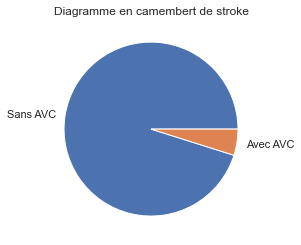

In [23]:
proportions.plot.pie(labels=["Sans AVC", "Avec AVC"])
plt.title("Diagramme en camembert de stroke")
plt.ylabel('')

<p style="font-family:'Times New Roman'">Nous remarquons que 95.13% des personnes sont atteintes d'AVC contre seulement 4.87% de personnes atteintes d'AVC.</p>

In [24]:
# Transformation en variable catégorielle de la cible
data_frame["stroke"] = data_frame["stroke"].astype("category")

<h2 align="center" class="alert alert-success">Compréhension des différentes variables</h2>

<p style="font-family:'Times New Roman'">Analysons les variables à l'aide de graphiques.
Nous devons d'abord transformer les types ('object' et 'int') des variables catégorielles en type 'category' pour faciliter les analyses.</p>

In [25]:
# Transformation en type category de tous les variables catégorielles
for column in categorical_columns:
    data_frame[column] = data_frame[column].astype('category')

In [26]:
data_frame[categorical_columns].dtypes

hypertension      category
heart_disease     category
gender            category
ever_married      category
work_type         category
Residence_type    category
smoking_status    category
dtype: object

<h3 align="center" class="alert alert-warning">Variables catégorielles</h3>

<p style="font-family:'Times New Roman'">Identifions la proportion de chaque classe.</p>

In [27]:
# Récupérons les proportions des variables dans une liste
proportions = []
for column in categorical_columns:
    proportion = data_frame[column].value_counts(normalize = True)*100
    proportions.append(proportion)
    print(f"Colonne {column} :\n{proportion}\n-------------------\n")

Colonne hypertension :
0    90.254403
1     9.745597
Name: hypertension, dtype: float64
-------------------

Colonne heart_disease :
0    94.598826
1     5.401174
Name: heart_disease, dtype: float64
-------------------

Colonne gender :
Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64
-------------------

Colonne ever_married :
Yes    65.616438
No     34.383562
Name: ever_married, dtype: float64
-------------------

Colonne work_type :
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: work_type, dtype: float64
-------------------

Colonne Residence_type :
Urban    50.802348
Rural    49.197652
Name: Residence_type, dtype: float64
-------------------

Colonne smoking_status :
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64
-------------------



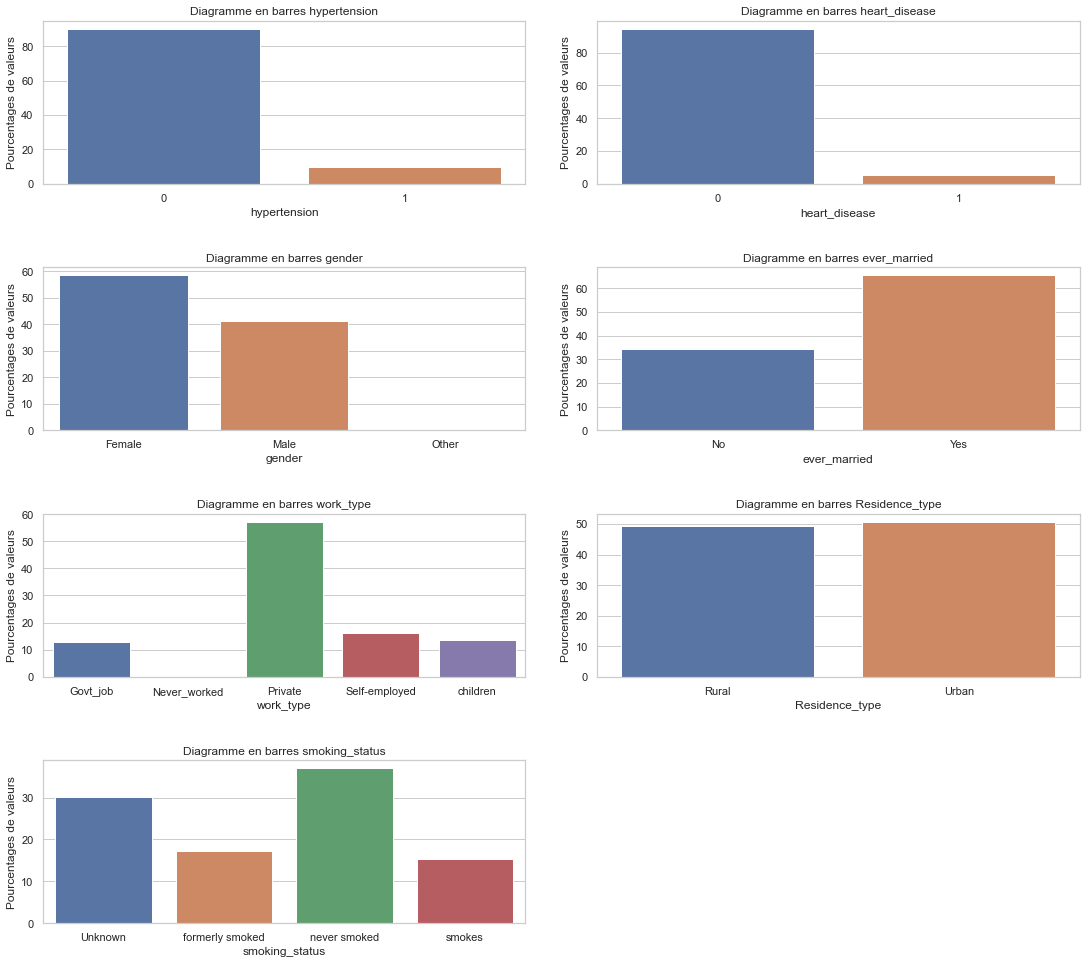

In [28]:
# Tracons le diagramme en barres des proportions pour chaque variable
fig, axs = plt.subplots(4, 2, figsize = (16, 14))
axs = axs.flat

for i, p in enumerate(proportions):
    fig.tight_layout(pad = 3)
    sns.barplot(x = p.index, y = p.values, ax = axs[i])
    axs[i].set_title(f"Diagramme en barres {p.name}")
    axs[i].set_xlabel(p.name)
    axs[i].set_ylabel("Pourcentages de valeurs")
    
fig.delaxes(axs[7])
    

<h3 align="center" class="alert alert-warning">Variables non catégorielles</h3>

<p style="font-family:'Times New Roman'">Comptons le nombre de patients par age à l'aide d'un countplot.</p>

Text(0.5, 1.0, 'Nombre de patients par age')

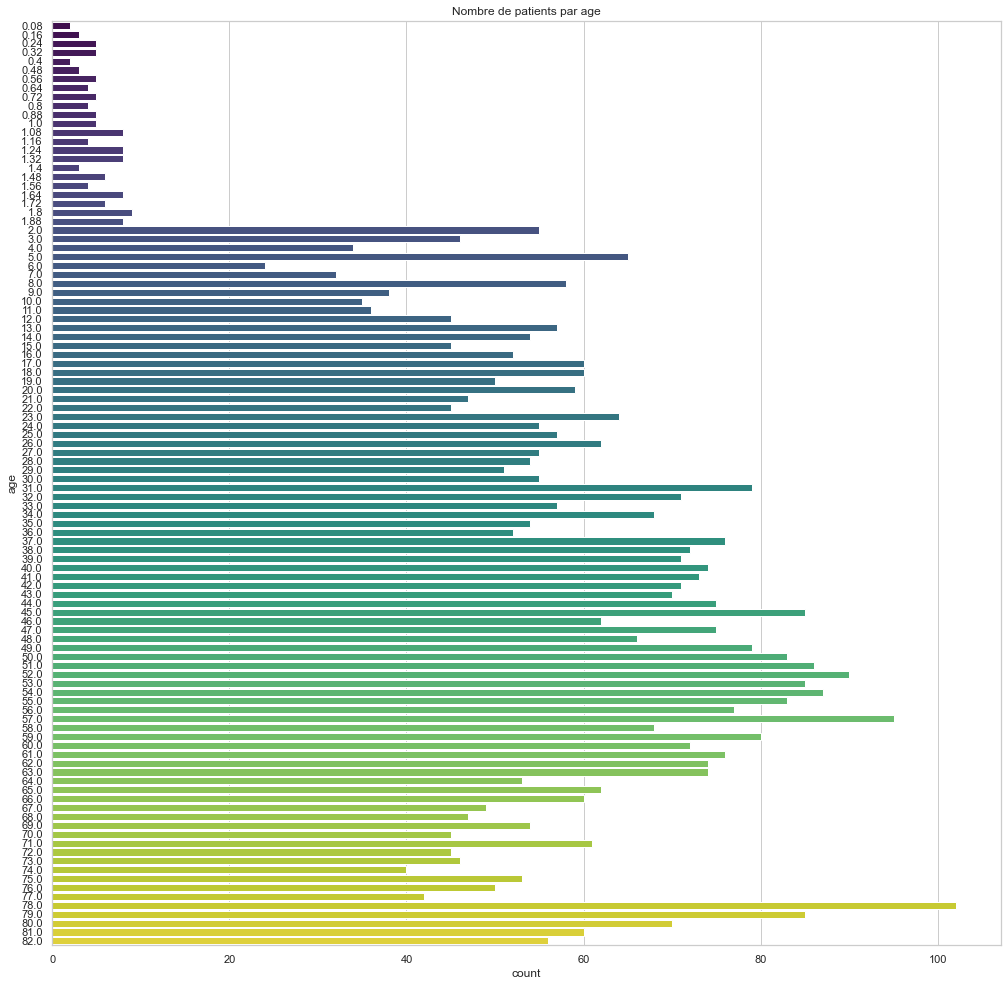

In [29]:
plt.figure(figsize = (17, 17))
sns.countplot(data = data_frame, y = "age", palette = "viridis")
plt.title("Nombre de patients par age")

<p style="font-family:'Times New Roman'">Nous constatons qu'il y a plus de patients adultes que de patients jeunes. Le plus grand nombre de tests a été effectué sur les personnes agées de 78 ans. Visualisons la distribution de la variable age.</p>

Text(0.5, 1.0, 'Distribution de la variable age')

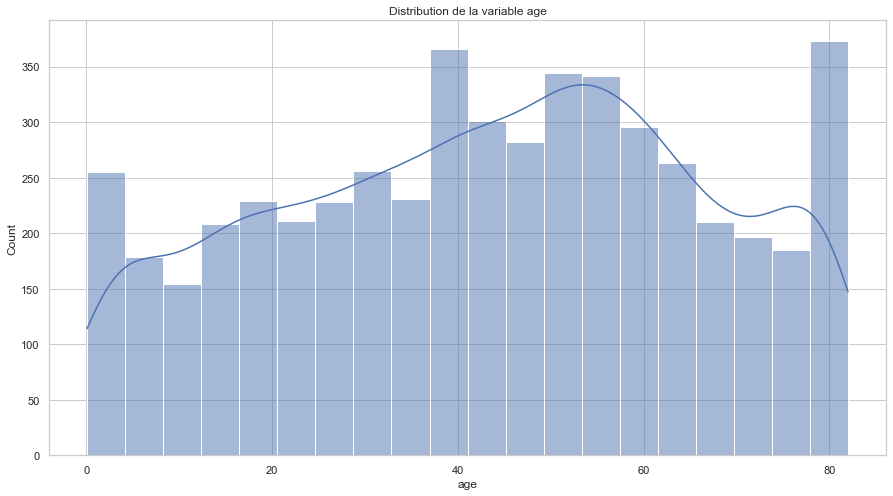

In [30]:
plt.figure(figsize = (15, 8))
sns.histplot(data = data_frame, x = "age", kde = True)
plt.title("Distribution de la variable age")

<p style="font-family:'Times New Roman'">La variable age ne suit pas une distribution normale. Nous remarquons que la distribution est plus élevée au niveau des patients âgés entre 37 et 63 ans. Elle est moins élevée au niveau des jeunes patients.</p>


<p style="font-family:'Times New Roman'">Traçons les histogrammes du niveau moyen de glucoses dans le sang et celui de l'indice de masse corporelle.
</p>

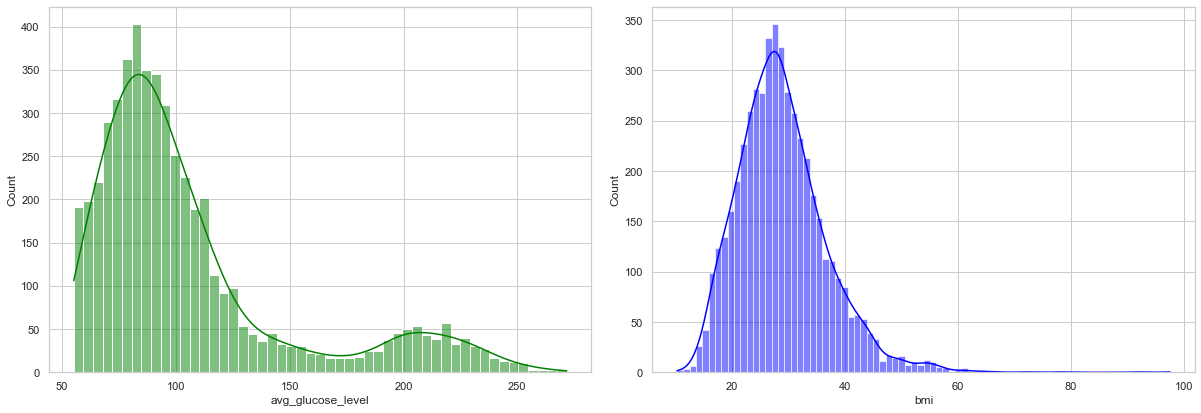

In [31]:
fig, axs = plt.subplots(1, 2, figsize = (17, 6))

axs = axs.flat

for i, column in enumerate(non_categorical_columns[-2:]):
    fig.tight_layout(w_pad = 3, pad = 1.2)
    color = "green" if i == 0 else "blue" 
    sns.histplot(data = data_frame, x = column, kde = True, ax = axs[i], color = color)
    

<p style="font-family:'Times New Roman'">Nous remarquons, pour la variable avg_glucose_level, une composition de deux distributions (la deuxième à l'aire de se détacher de la première). La première distribution ressemble à une distribution normale avec une plus grande variance que la deuxième et sa moyenne tourne autour de 75-87 mg/dL de sang. Pour la deuxième distribution, dont la variance est plus faible, nous notons une moyenne tournant autour de 210-225 mg/dL.</p>

<p style="font-family:'Times New Roman'">Nous remarquons, pour la variable bmi, une distribution qui semble être normale avec une moyenne tournant autour de 30 kg/m2.</p>

<h2 align="center" class="alert alert-success">Utilisation de Pandas Profiling</h2>

<p style="font-family:'Times New Roman'">Utilisons la librairie pandas profiling pour affiner nos analyses.</p>

In [32]:
# profile = ProfileReport(data_frame, title = "Investigation avec Pandas Profiling")

In [33]:
# profile

<p style="font-family:'Times New Roman'">Nous reviendrons à quelques remarques effectuées par pandas profiling plus tard. Nous pouvons passer à l'analyse des relations entre les variables.</p>

<h2 align="center" class="alert alert-success">Relations entre la cible et les variables explicatives</h2>

<h3 align="center" class="alert alert-warning">Variables catégorielles / cible</h3>

<p style="font-family:'Times New Roman'">Analysons ces relations en utilisant les tableaux croisés (de comptage).</p>

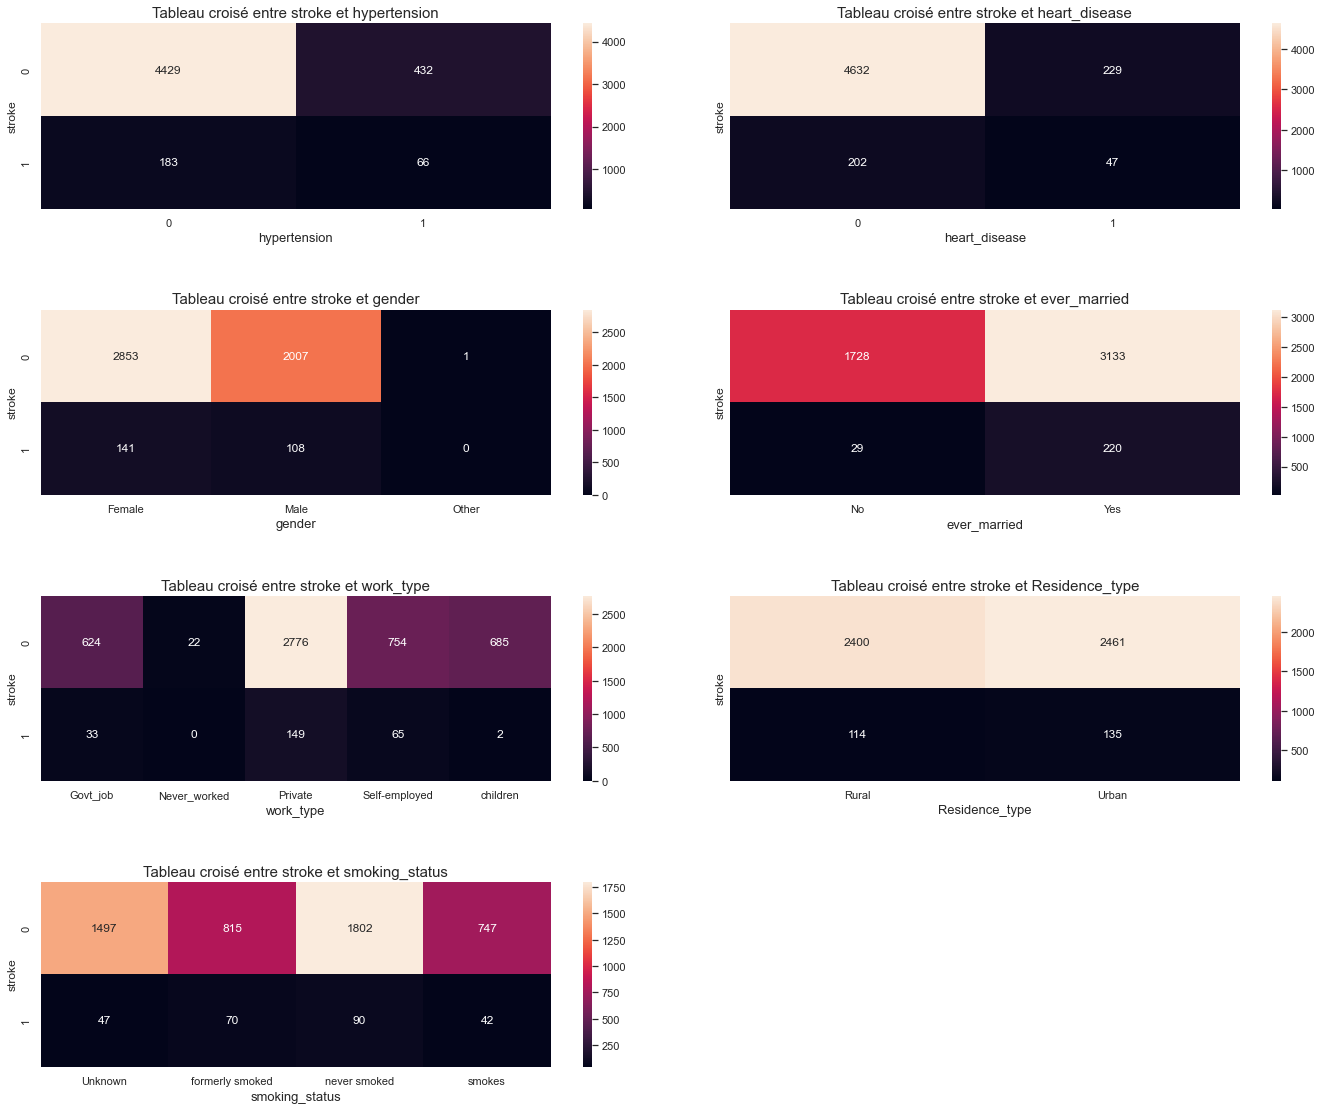

In [34]:
# Affichons des tableaux croisés entre la cible et chaque variable catégorielle à l'aide d'un heatmap.

fig, axs = plt.subplots(4, 2, figsize = (20, 16), sharey = True)
axs = axs.flat

for i, column in enumerate(categorical_columns):
    fig.tight_layout(pad = 3, h_pad = 4)
    sns.heatmap(pd.crosstab(data_frame["stroke"], data_frame[column]), annot = True, fmt = "d", ax = axs[i])
    axs[i].set_title(f"Tableau croisé entre stroke et {column}", fontsize = 15)
    axs[i].set_xlabel(column, fontsize = 13)
    
fig.delaxes(axs[7])

<p style="font-family:'Times New Roman'">Nous remarquons que pour la variable work_type, on a une proportion de patients malades moins importante au niveau de la catégorie children.
Nous remarquons également que pour la variable smoking_status, la proportion de patients malades est moins importante au niveau de la catégorie unknown. Pour le reste des variables nous ne notons pas de différences considérables entre les différentes proportions.</p>

<h3 align="center" class="alert alert-warning">Variables non catégorielles / variable cible</h3>

<p style="font-family:'Times New Roman'">Dans cette partie, nous devons affiner les analyses effectuées sur les variables non catégorielles en tracant des distributions suivant les différentes classes possibles de la variable cible. Nous verifierons ensuite si les distributions obtenues sont semblables.</p>

**Pour la variable age**

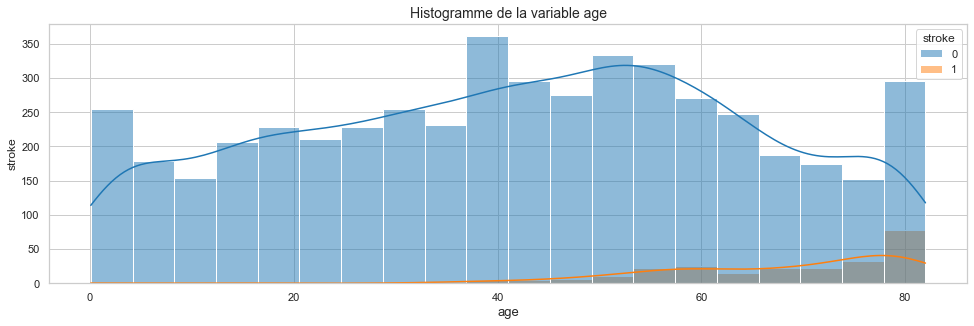

In [35]:
plt.figure(figsize = (15, 6))
sns.histplot(data = data_frame, x = "age", hue = "stroke", kde = True, palette = "tab10")
plt.title(f"Histogramme de la variable age", fontsize = 14)
plt.xlabel("age", fontsize = 13)
plt.ylabel("stroke", fontsize = 12)
plt.tight_layout(pad = 5)

<p style="font-family:'Times New Roman'">Nous voyons que les deux distributions sont différentes. Nous constatons que les personnes plus agées ont plus de risque d'être atteintes d'AVC.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable avg_glucose_level</strong></p>

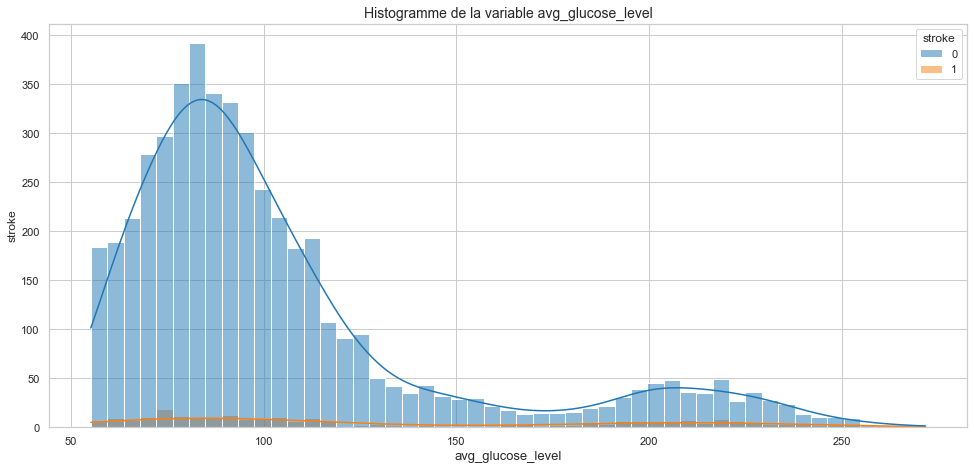

In [36]:
plt.figure(figsize = (15, 8))
sns.histplot(data = data_frame, x = "avg_glucose_level", hue = "stroke", kde = True, palette = "tab10")
plt.title(f"Histogramme de la variable avg_glucose_level", fontsize = 14)
plt.xlabel("avg_glucose_level", fontsize = 13)
plt.ylabel("stroke", fontsize = 12)
plt.tight_layout(pad = 5)

<p style="font-family:'Times New Roman'">Nous remarquons une différence entre les deux distributions qui ne semble pas très visible.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable bmi</strong>. Nous pouvons remplacer les valeurs manquantes de la variable par la valeur la plus fréquente (mode).</p>

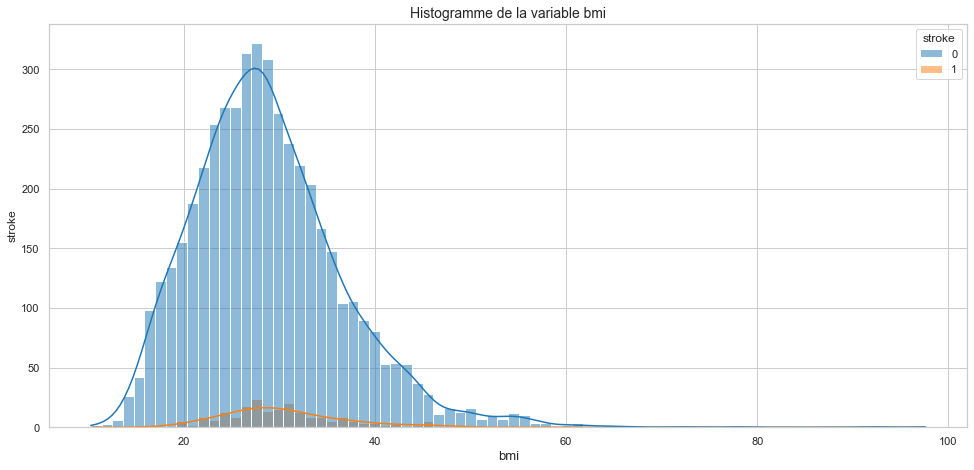

In [37]:
mode = data_frame["bmi"].mode()
data_to_plot = data_frame.fillna(mode)
plt.figure(figsize = (15, 8))
sns.histplot(data = data_to_plot, x = "bmi", hue = "stroke", kde = True, palette = "tab10")
plt.title(f"Histogramme de la variable bmi", fontsize = 14)
plt.xlabel("bmi", fontsize = 13)
plt.ylabel("stroke", fontsize = 12)
plt.tight_layout(pad = 5)

<p style="font-family:'Times New Roman'">Nous obtenons à peu près les mêmes distributions pour les deux classes de la cible.</p>

<h2 align="center" class="alert alert-success">Relations entre variables non catégorielles</h2>

<p style="font-family:'Times New Roman'">Vérifions si certaines variables non catégorielles ont une forte corrélation entre elles.</p>

In [38]:
px.imshow(data_frame[non_categorical_columns].corr().round(2))

<p style="font-family:'Times New Roman'">Nous remarquons qu'aucune des coefficients de corrélation obtenues ne dépasse 50%. Les variables quantitatives ne partagent aucune corrélation entre elles.</p>

<h2 align="center" class="alert alert-success">Relations entre variables catégorielles et non catégorielles</h2>

<p style="font-family:'Times New Roman'">Nous allons vérifier pour chaque variable quantitative si elle est influencée par une ou plusieurs variable(s) catégorielle(s).</p>

In [39]:
def rel_cat_quant(categorical_column):
    """Fonction pour vérifier les relations pouvant exister entre les variables qualitatives
    et quantitatives. Nous allons utiliser la base de données ne comportant pas de valeurs 
    manquantes.
    
    Args:
        categorical_column(str): Nom de la variable catégorielle
    
    Returns:
        None
    """
    
    fig, axs = plt.subplots(2, 2, figsize = (18, 13))

    axs = axs.flat

    for i,column in enumerate(non_categorical_columns):

        sns.histplot(data = data_to_plot, x = column, kde = True, hue = categorical_column, ax = axs[i], palette = "tab10")

        axs[i].set_title(f"Variable {column}", fontsize = 14)

    fig.delaxes(axs[3])

    fig.tight_layout(pad = 3)

<p style="font-family:'Times New Roman'"><strong>Pour la variable hypertension</strong></p>

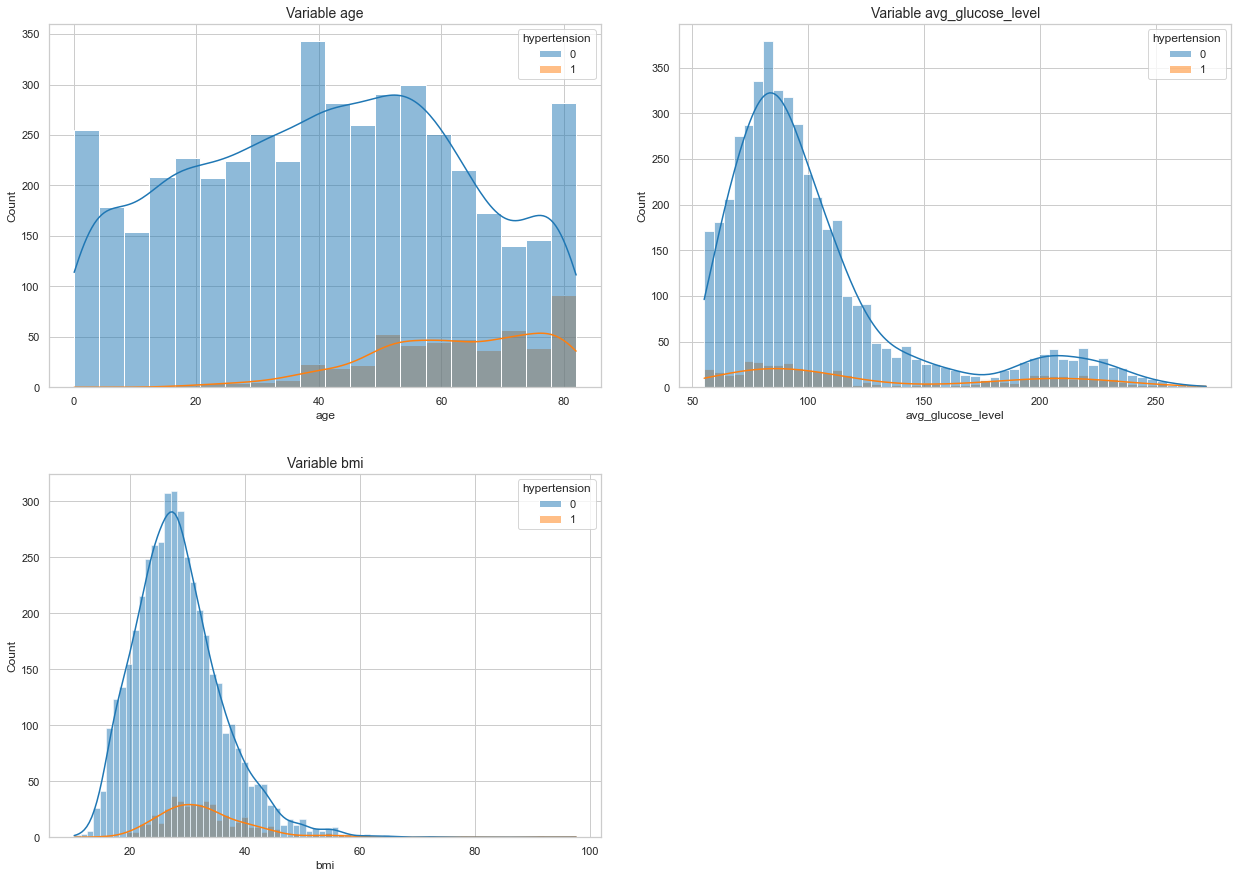

In [40]:
rel_cat_quant("hypertension")

<p style="font-family:'Times New Roman'">Nous remarquons une <strong>légère dépendance</strong> entre les variables <strong>hypertension</strong> et <strong>age</strong>.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable heart_disease</strong></p>

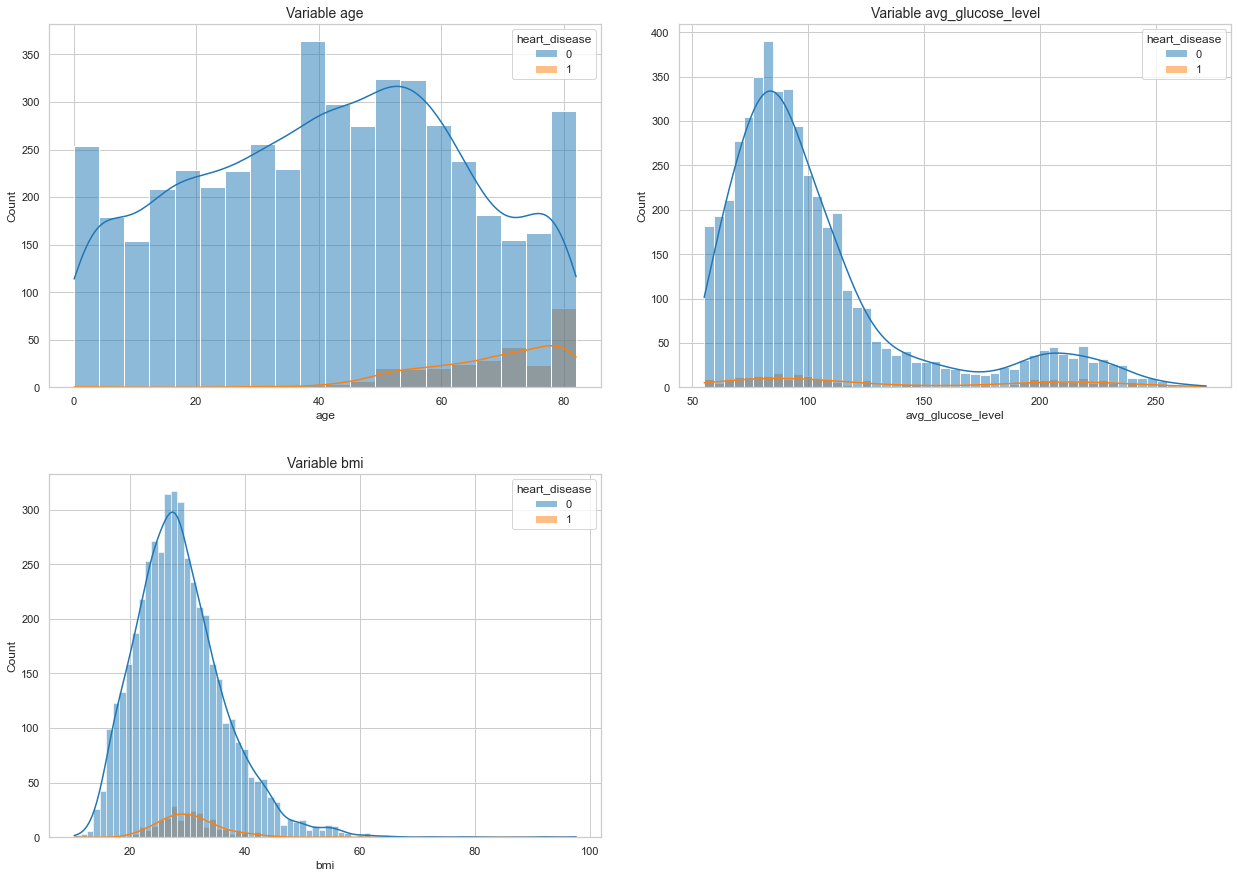

In [41]:
rel_cat_quant("heart_disease")

<p style="font-family:'Times New Roman'">Nous constatons également une <strong>légère dépendance</strong> entre les variables <strong>heart_disease</strong> et <strong>age</strong>.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable gender</strong></p>

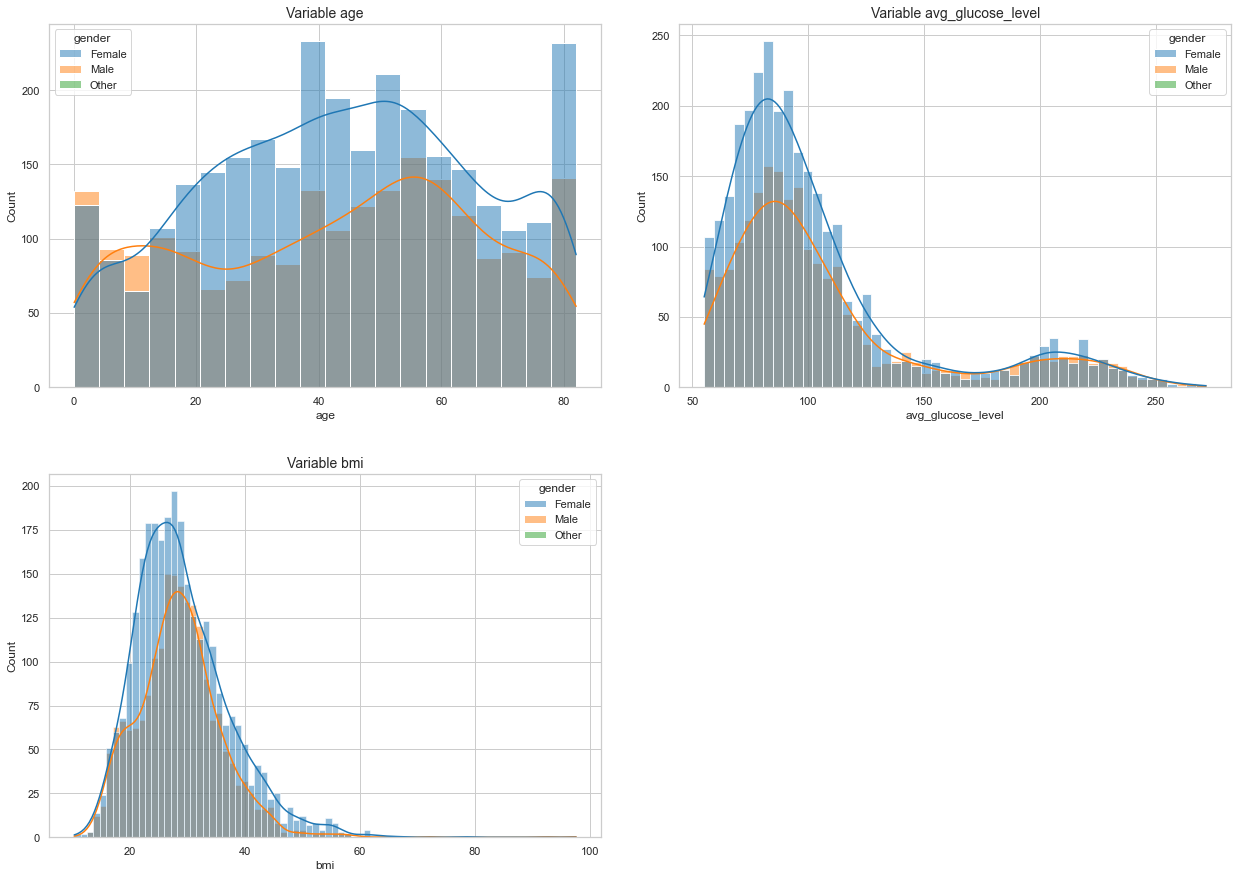

In [42]:
rel_cat_quant("gender")

<p style="font-family:'Times New Roman'">Nous ne remarquons <strong>aucune corrélation</strong> entre la variable <strong>age</strong> et <strong>gender</strong></p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable ever_married</strong></p>

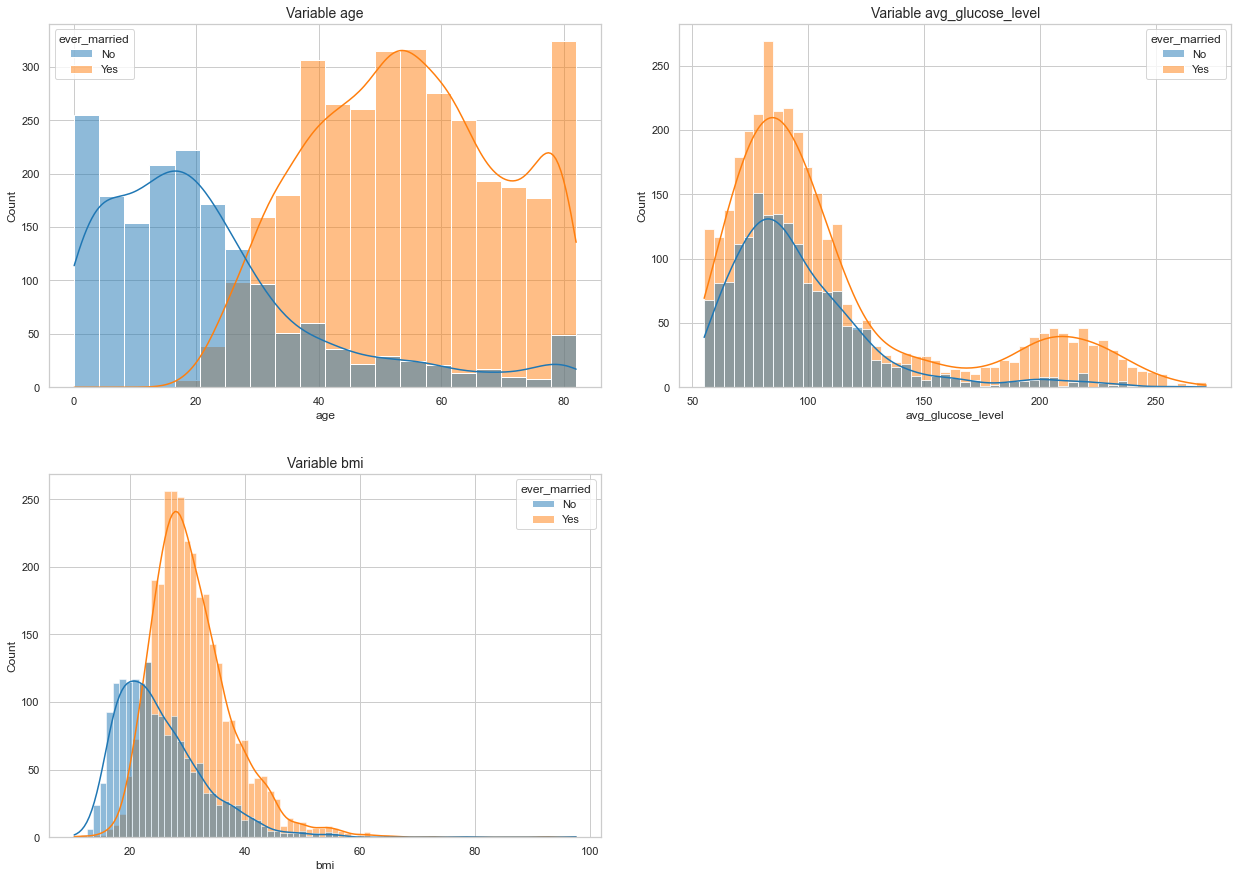

In [43]:
rel_cat_quant("ever_married")

<p style="font-family:'Times New Roman'">La variable <strong>ever_married</strong> est <strong>fortement corrélée</strong> avec les variables <strong>age</strong> et <strong>bmi</strong>.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable work_type</strong></p>

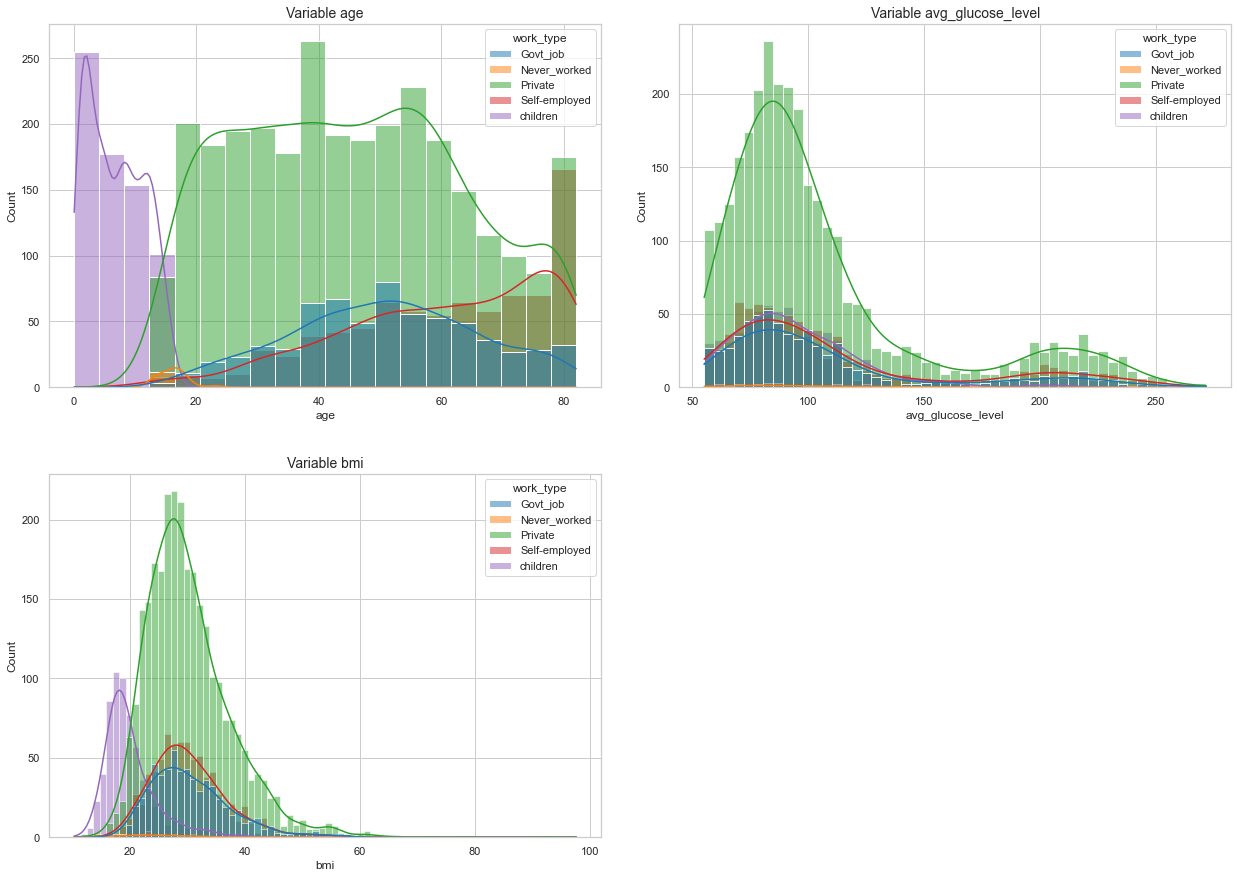

In [44]:
rel_cat_quant("work_type")

<p style="font-family:'Times New Roman'">La variable <strong>work_type</strong> également réalise une <strong>forte corrélation</strong> entre les variables <strong>age</strong> et <strong>bmi<strong>. <i>Nous remarquons que la catégorie children de work_type désigne les patients enfants (donc la variable work_type est cohérente pour le reste de l'analyse)</i>.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable residence_type</strong></p>

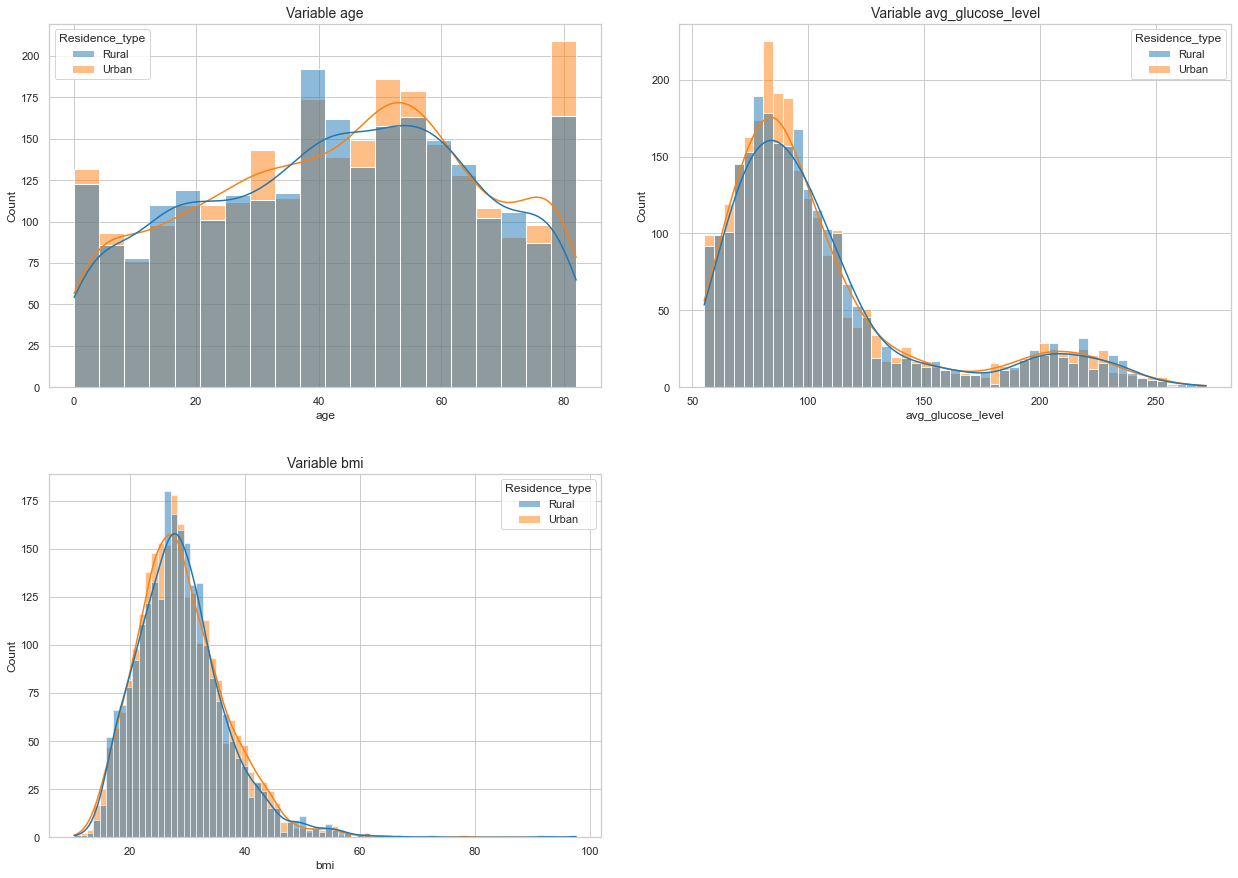

In [45]:
rel_cat_quant("Residence_type")

<p style="font-family:'Times New Roman'">La variable <strong>Residence_type</strong> <strong>n'est pas corrélée</strong> avec la variable <strong>age</strong>.</p>

<p style="font-family:'Times New Roman'"><strong>Pour la variable smoking_status</strong>. Remplacons la catégorie <i>unknown</i> par <i>never smoked</i> pour avoir une meilleure représentation de la variable.</p>

In [46]:
data_to_plot["smoking_status"] = data_to_plot["smoking_status"].apply(lambda x: "never smoked" if x == "Unknown" else x)

In [47]:
data_to_plot["smoking_status"].value_counts(normalize=True)*100

never smoked       67.240705
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64

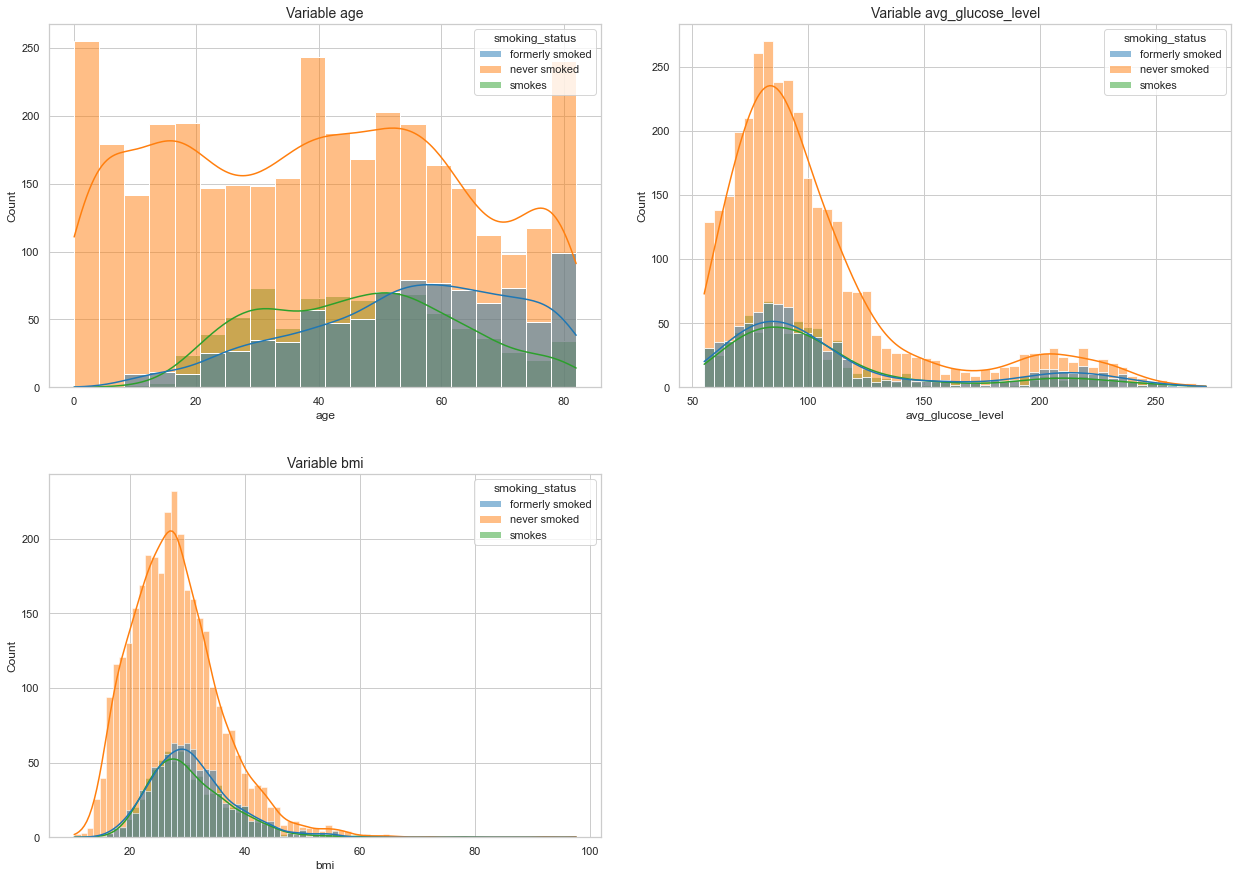

In [48]:
rel_cat_quant("smoking_status")

<p style="font-family:'Times New Roman'">La variable <strong>smoking_status</strong> est <strong>fortement corrélée</strong> avec la variable <strong>age</strong>.</p>

<h2 align="center" class="alert alert-success">Identification des valeurs aberrantes</h2>

<p style="font-family:'Times New Roman'">Tracons les boxplots des variables catégorielles en les séparant par classe de patients (atteints d'AVC ou pas).</p>

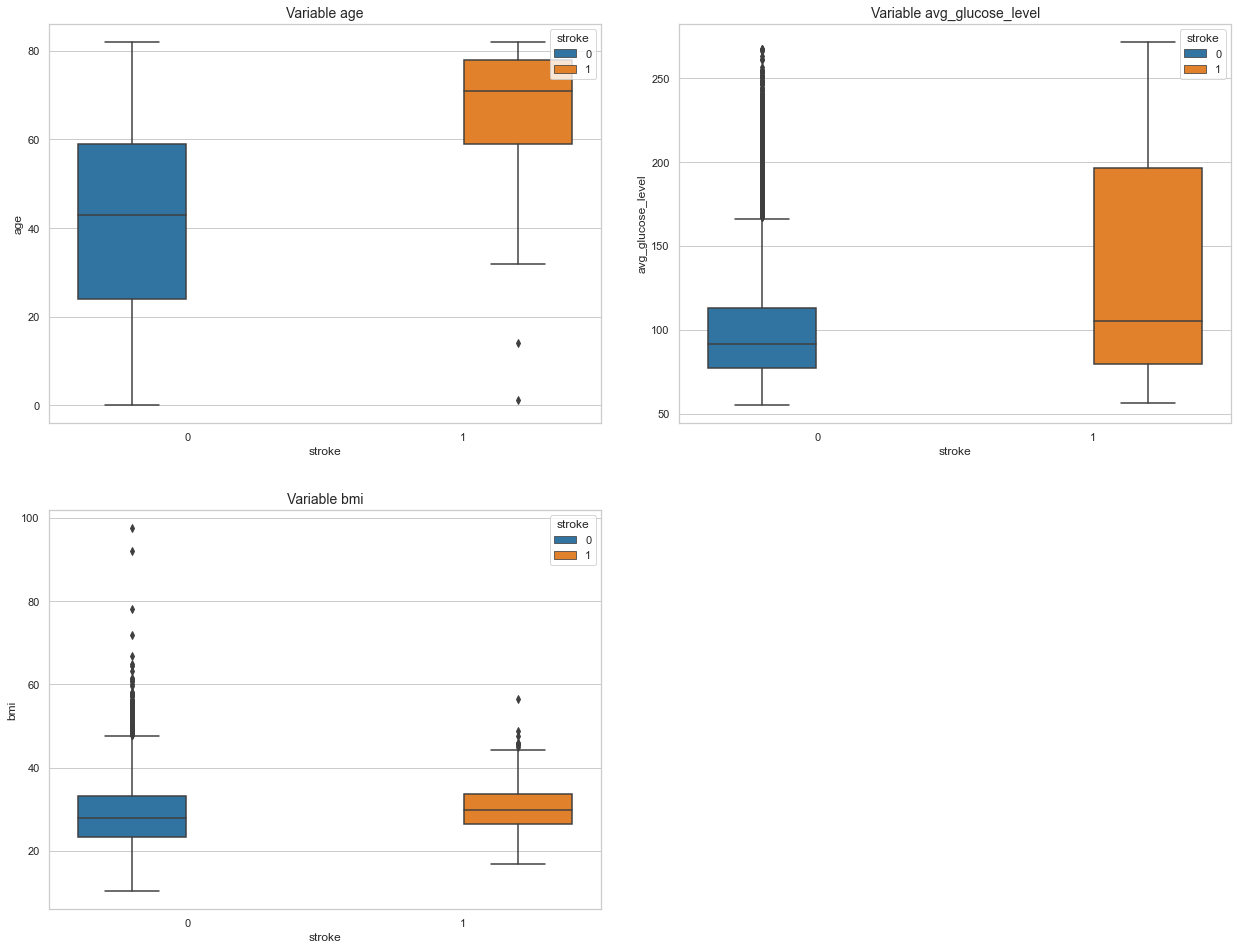

In [49]:
fig, axs = plt.subplots(2, 2, figsize = (18, 14))

axs = axs.flat

for i,column in enumerate(non_categorical_columns):

    sns.boxplot(data = data_to_plot, x = "stroke", y = column, hue = "stroke", ax = axs[i], palette = "tab10")

    axs[i].set_title(f"Variable {column}", fontsize = 14)

fig.delaxes(axs[3])

fig.tight_layout(pad = 3)

<p style="font-family:'Times New Roman'">Nous constatons que tous les trois variables comportent des valeurs aberrantes. Surtout du coté de la classe *test negatif* de la variable stroke (pour les variables bmi et avg_glucose_level).</p>

<h2 align="center" class="alert alert-success">Test d'hypothéses</h2>

<p style="font-family:'Times New Roman'">Vérifions si certaines variables quantitatives influencent le fait qu'un patient soit atteint d'AVC ou pas avec un test de student.</p>

In [50]:
# Définition de la fonction pour effectuer des tests
def student_test(dataframe1: pd.DataFrame, dataframe2: pd.DataFrame, colonnes: list, alpha: float):
    """Cette fonction permet d'effectuer un test de student.
    
    Args:
        dataframe1(pandas.DataFrame): Les données de la première classe.
        dataframe2(pandas.DataFrame): Les données de la deuxième classe.
        colonne(list): Les noms des colonnes sur les quelles on va réaliser le test.
        alpha(float): Le taux d'erreur alpha de l'hypothèse nulle.
    
    Returns:
        None
    """
    
    # Choix d'un échantillon pour le dataframe qui a la plus grande taille
    if dataframe1.shape[0] <= dataframe2.shape[0]:
        dataframe2 = dataframe2.sample(dataframe1.shape[0])
    else:
        dataframe1 = dataframe1.sample(dataframe2.shape[0])
        
    for colonne in colonnes:
        stat, p = ttest_ind(dataframe1[colonne], dataframe2[colonne])
        if  p < alpha:
            print(f"{colonne:-<30} : H0 rejetée")
        else:
            print(f"{colonne:-<30} : H0 non rejetée")

<p style="font-family:'Times New Roman'">Nous devons d'abord séparer le dataframe entre les catégories <i>test positif</i> et <i>test negatif</i></p>

In [51]:
df_positif, df_negatif = data_frame[data_frame["stroke"] == 1], data_frame[data_frame["stroke"] == 0]

In [52]:
# Effectuons le test
student_test(df_positif, df_negatif, non_categorical_columns, 0.02)

age--------------------------- : H0 rejetée
avg_glucose_level------------- : H0 rejetée
bmi--------------------------- : H0 non rejetée


<p style="font-family:'Times New Roman'">Selon le test <strong>seule la variable bmi n'influence pas le fait qu'un patient soit malade ou pas</strong>.</p>

<h1 align="center" class="alert alert-info">Phase de Prétraitement des données</h1>

<h2 align="center" class="alert alert-success">Étapes du prétraitement</h2>
<div style ="font-family:'Times New Roman'" align="justify">
<p>Nous allons effectuer plusieurs traitements sur les données et vérifier le score obtenu après entraînement d'un modèle d'arbre de décision (il ne s'agit pas du modèle final). Nous considérons que l'arbre de décision est le modèle de classification le plus facile à interpréter c'est pourquoi il est nécessaire de l'utiliser durant la phase de prétraitement.</p>
<ul>
    <li><strong>Suppression de variables</strong> : Nous diminuons considérablement le risque de sur-entraînement de nos modèles en supprimant les variables inutiles. Les variables fortement corrélées entre elles fournissent les mêmes informations au modèle. Ce surplus d'informations peut-être corrigé avec la suppression de certaines variables.</li>
    <li><strong>Suppression des données aberrantes</strong> : Toutes les valeurs de la variable avg_glucose_level supérieures à environ 169 mg/dL, soit les valeurs désignant les patients qui ont un taux anormal de glucose dans le sang, sont supprimées. Nous obtenons ainsi une distribution à peu près normale pour la variable avg_glucose_level. La distribution de la variable age reste à peu près la même. Après la suppression des valeurs aberrantes, la taille de l'échantillon est de <strong>4483</strong>.</li>
    <li><strong>Séparation des données</strong> en données d'entraînement et de test : Les données d'entraînement vont contenir <strong>3586</strong> observations et les données de test, <strong>897</strong> observations.</li>
    <li><strong>Encodage des données qualitatives</strong> : </li>
    <li><strong>Entraînement du modèle de test</strong> : </li>
    <li><strong>Evaluation du modèle</strong> : En supprimant uniquement les variables bmi, work_type, ever_married, smoking_status et id on obtient une sensibilité de <strong>96%</strong> pour la classe <i>test negatif</i> et seulement <strong>20%</strong> pour la class <i>test positif</i>.</li>
    <li><strong>Selection de variables</strong> : Les variables gender, hypertension, heart_disease et Residence_type sont celles qui doivent être supprimées. Ces variables sont les moins explicatives du lot de variables qui ont servies à la précedente entraînement. Les variables age et avg_glucose_level sont à l'inverse les meilleures variables.</li>
    <li><strong>Entraînement et évaluation du modèle de test</strong> avec les variables choisies : Nous obtenons une sensibilité de <strong>96%</strong> pour la classe <i>test negatif</i> et <strong>29%</strong> (soit une amélioration de 9%) pour la classe <i>test positif</i>.</li>
    <li><strong>Conclusion</strong> : Nous obtenons un bon score pour la classe <i>test negatif</i> mais pas pour la classe <i>test positif</i> qui reste très faible. Nous supposons que les données utilisées n'expliquent pas bien le phénomène *attraper un AVC*.</li>
    <li><strong>Recommandations</strong> : Il est crucial de recueillir plus de données et d'augmenter le nombre de variables pertinentes nécessaires à l'analyse et à l'entraînement d'un modèle de détection d'AVC. La complétude dans la collecte n'a pas été totalement respectée.</li>
</ul>
</div>



<p style="font-family:'Times New Roman'">Conception d'une classe comprenant les différentes étapes du traitement.</p>

In [53]:
class Traitement:
    """Cette classe va nous permettre d'effectuer des traitements sur les données.
    
    Attributes:
        dataframe(pandas.DataFrame): Les données avant tout traitement.
        cible(str): Le nom de la variable cible
    """
    
    def __init__(self, dataframe, cible):
        """Initialisation des attributs
        """
        if cible in dataframe.columns:
            self.dataframe = dataframe.copy()
            self.cible = cible
        else:
            raise ValueError("Le nom de la cible ne correspond à aucune colonne")
    
    def colonne_existe(self, colonne):
        """Fonction permettant de vérifier si une colonne existe.
        """
        return True if colonne in self.dataframe.columns else False
    
    def supprimer_colonnes(self, colonnes):
        """Cette fonction permet de supprimer des colonnes.
        """
        for colonne in colonnes:
            if self.colonne_existe(colonne):
                self.dataframe.drop(colonne, axis = 1, inplace = True)
            else:
                raise ValueError(f"La colonne {colonne} n'existe pas.")
    
    def modification_categorie(self, colonne, categorie_a_modif, categorie_de_modif):
        """Cette fonction permet de modifier une catégorie par une autre catégorie au sein
        d'une variable catégorielle.
        """
        modif = lambda x: categorie_de_modif if x == categorie_a_modif else x
        if self.colonne_existe(colonne):
            if self.dataframe[colonne].dtype == "category":
                self.dataframe[colonne] = self.dataframe[colonne].apply(modif)
                self.dataframe[colonne] = self.dataframe[colonne].astype('category')
            else:
                raise TypeError(f"La colonne {colonne} n'est pas une colonne catégorielle.")
        else:
            raise ValueError(f"La colonne {colonne} n'existe pas.")
    
    def supprimer_aberrantes(self, colonne):
        """Cette fonction permet de remplacer les valeurs aberrantes par la médiane 
        des données suivant une colonne à préciser
        """
        if self.colonne_existe(colonne):
            quantile_1 = self.dataframe[colonne].quantile(0.25)
            quantile_2 = self.dataframe[colonne].quantile(0.75)
            mediane = self.dataframe[colonne].median()
            inter_quantile = quantile_2 - quantile_1
            limite_bas = quantile_1 - 1.5 * inter_quantile
            limite_haut = quantile_2 + 1.5 * inter_quantile
#             remplacer_aberrante = lambda x : mediane if (x < limite_bas or x > limite_haut) else x
#             self.dataframe[colonne] = self.dataframe[colonne].apply(remplacer_aberrante)
            self.dataframe = self.dataframe[(self.dataframe[colonne] > limite_bas) & (self.dataframe[colonne] < limite_haut)]
        else:
            raise ValueError(f"La colonne {colonne} n'existe pas.")
    
    def separer_donnees(self, dataframe):
        """Cette fonction permet de séparer les données d'entraînement des données de test
        """
        y = dataframe[self.cible]
        
        X = dataframe.drop(self.cible, axis = 1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
        
        return X_train, X_test, y_train, y_test
    
    def encodage(self):
        """Cette fonction permet d'encoder les valeurs qualitatives
        """
        dataframe = self.dataframe.copy()
        for colonne in dataframe.select_dtypes("category").columns:
            dataframe[colonne] = self.dataframe[colonne].cat.codes
        return dataframe
    
    def selection_variables(self, modele, X_train, y_train):
        """Cette fonction permet de sélectionner les variables qui apportent le plus d'information
        au modèle donné en paramètre.
        """
        from sklearn.feature_selection import SelectFromModel
        selector = SelectFromModel(modele)
        selector.fit(X_train, y_train)
        print(f"Colonnes choisies : \n", X_train.columns[selector.get_support()])
        return selector
    
    def premier_entrainement(self, X_train, y_train):
        """Cette fonction permet d'entraîner le premier modèle pour vérifier si le traitement effectué
        est bon.
        """
        from sklearn.tree import DecisionTreeClassifier
        
        modele = DecisionTreeClassifier(random_state = 4)
        
        modele.fit(X_train, y_train)
        
        return modele
    
    def evaluation(self, modele, nom_modele, X_train, X_test, y_train, y_test, plot_roc = False):
        """Cette fonction permet d'évaluer un modèle
        """
        from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
        from sklearn.model_selection import learning_curve
        import numpy as np
        
        y_pred = modele.predict(X_test)
        
        print(f"La precision du modèle : {accuracy_score(y_test, y_pred)}")
        print(f"Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}")
        print(f"Rapport de classification : \n{classification_report(y_test, y_pred)}")
        
        N, train_score, test_score = learning_curve(modele, X_train, y_train, cv = 5, train_sizes = np.linspace(0.1, 1, 10))
        
        fig, axs = plt.subplots(1, 2, figsize = (17, 8))  
        
        axs[0].plot(N, train_score.mean(axis = 1), label = "score_entrainement")
        axs[0].plot(N, test_score.mean(axis = 1), label = "score_test")
        axs[0].set_title(f"Evaluation {nom_modele}")
        axs[0].set_xlabel(f"Tailles")
        axs[0].set_ylabel(f"Scores")
        axs[0].legend()
        
        plot_roc_curve(modele, X_test, y_test, ax = axs[1])
        axs[1].set_title(f"Courbe ROC {nom_modele}")
         
        fig.tight_layout(w_pad = 3)
        

In [54]:
# Création d'une instance de la classe Traitement 
traitement = Traitement(data_frame, "stroke")

<h2 align="center" class="alert alert-success">suppression de variables</h2>

<p style="font-family:'Times New Roman'">Supprimons les colonnes bmi, work_type, ever_married, smoking_status et id.</p>

In [55]:
traitement.supprimer_colonnes(['bmi', 'work_type', 'ever_married', 'smoking_status', 'id'])    

In [56]:
# Vérifions quelles sont les variables restantes 
traitement.dataframe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'Residence_type',
       'avg_glucose_level', 'stroke'],
      dtype='object')

<h2 align="center" class="alert alert-success">Suppression des données aberrantes</h2>

In [57]:
traitement.supprimer_aberrantes("age")
traitement.supprimer_aberrantes("avg_glucose_level")

<p style="font-family:'Times New Roman'">Traçons les distributions des deux variables quantitatives.</p>

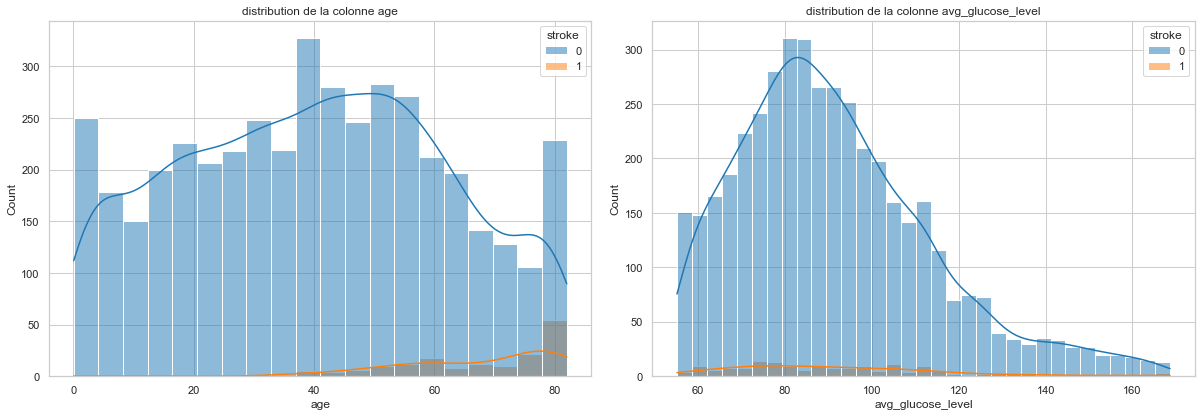

In [58]:
fig, axs = plt.subplots(1, 2, figsize = (17, 6))

axs = axs.flat

for i, colonne in enumerate(["age", "avg_glucose_level"]):
    fig.tight_layout(w_pad = 3, pad = 1.2)
    sns.histplot(data = traitement.dataframe, x = colonne, hue = "stroke", kde = True, ax = axs[i], palette = "tab10")
    axs[i].set_title(f"distribution de la colonne {colonne}")

In [59]:
# Vérifions combien de données il nous reste
traitement.dataframe.shape[0]

4483

<h2 align="center" class="alert alert-success">Encodage des données qualitatives</h2>

<p style="font-family:'Times New Roman'">Nous devons récupérer dans une nouvelle variable le nouveau dataframe dont les données qualitatives seront encodées.</p>

In [60]:
new_data_frame = traitement.encodage()

<h2 align="center" class="alert alert-success">Séparation des données</h2>

In [61]:
X_train, X_test, y_train, y_test = traitement.separer_donnees(new_data_frame)

In [62]:
# Verifions les tailles des variables explicatives
X_train.shape, X_test.shape

((3586, 6), (897, 6))

<h2 align="center" class="alert alert-success">Premier entraînement avec un arbre de décision</h2>

In [63]:
modele = traitement.premier_entrainement(X_train, y_train)

<h2 align="center" class="alert alert-success">Evaluation du modèle</h2>

In [64]:
sns.set_theme(style = "darkgrid")

La precision du modèle : 0.9331103678929766
Matrice de confusion : 
[[830  32]
 [ 28   7]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       862
           1       0.18      0.20      0.19        35

    accuracy                           0.93       897
   macro avg       0.57      0.58      0.58       897
weighted avg       0.94      0.93      0.93       897



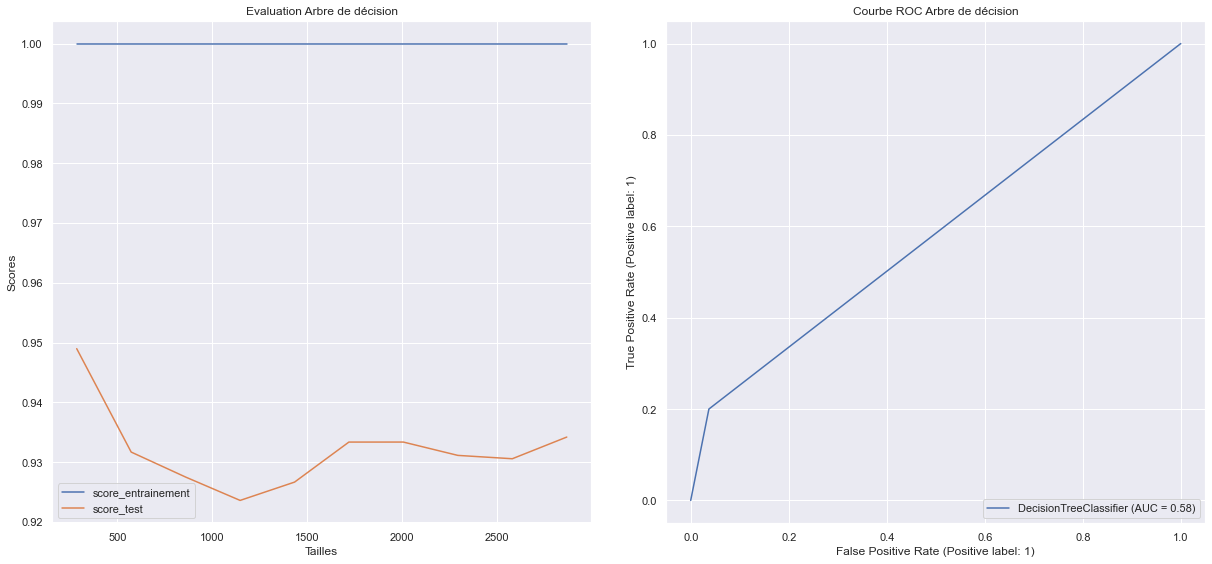

In [65]:
traitement.evaluation(modele, "Arbre de décision", X_train, X_test, y_train, y_test)

<h2 align="center" class="alert alert-success">Sélection de variables</h2>

<p style="font-family:'Times New Roman'">Vérifions quelles sont les variables qui apportent le plus d'information au modèle d'arbre de décision.</p>

In [66]:
selector = traitement.selection_variables(tree.DecisionTreeClassifier(random_state = 4), X_train, y_train)

Colonnes choisies : 
 Index(['age', 'avg_glucose_level'], dtype='object')


<p style="font-family:'Times New Roman'">Les variables qui n'apportent pas d'information au modèle sont les variables gender, hypertension, heart_disease et Residence_type qui vont être supprimées des données d'entraînement et de test.</p>

In [67]:
colonnes_choisies = X_train.columns[selector.get_support()]

In [68]:
X_train, X_test = X_train[colonnes_choisies], X_test[colonnes_choisies]

<h2 align="center" class="alert alert-success">Nouveau entraînement du modèle avec les variables choisies</h2>

<p style="font-family:'Times New Roman'"><strong>Entraînement</strong></p>

In [69]:
modele = traitement.premier_entrainement(X_train, y_train)

<p style="font-family:'Times New Roman'"><strong>Evaluation</strong></p>

La precision du modèle : 0.9364548494983278
Matrice de confusion : 
[[830  32]
 [ 25  10]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       862
           1       0.24      0.29      0.26        35

    accuracy                           0.94       897
   macro avg       0.60      0.62      0.61       897
weighted avg       0.94      0.94      0.94       897



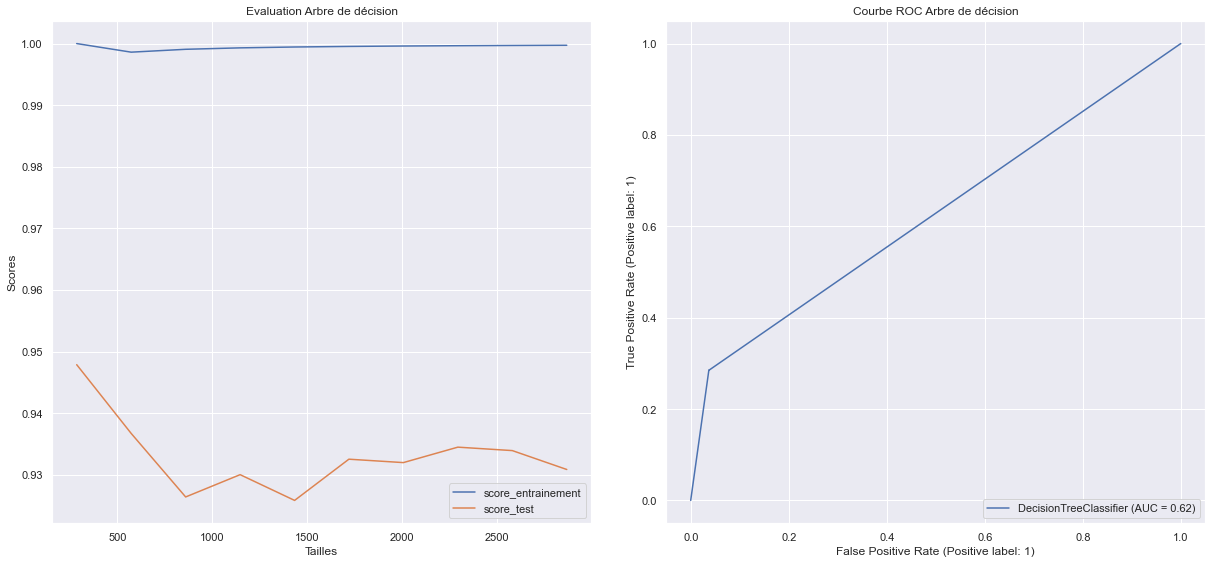

In [70]:
traitement.evaluation(modele, "Arbre de décision", X_train, X_test, y_train, y_test)

<p style="font-family:'Times New Roman'">Nous notons une amélioration du score.</p>

<h1 align="center" class="alert alert-info">Phase de modélisation</h1>

<h2 align="center" class="alert alert-success">Préambule</h2>
<p style="font-family:'Times New Roman'">On devra entraîner un certain nombre de modèles et sélectionner celui qui donnera le meilleur score et qui ne sera ni trop complexe (score élevé sur les données d'entraînement et faible sur les données de test) et ni trop simple (score faible sur les données d'entraînement et de test). 
    Le modèle final sera choisi parmi les suivantes : <strong>RandomForestClassifier</strong>, <strong>AdaBoostClassifier</strong>, <strong>SVC</strong>, <strong>KNeighborsClassifier</strong> et <strong>LogisticRegression</strong>.</p>


<p style="font-family:'Times New Roman'">Concevons une classe capable d'entraîner plusieurs modèles à partir des données qui lui seront fournies et qui héritera des méthodes de la classe de prétraitement.</p>

In [71]:
class SelectionModele(Traitement):
    """Cette classe permet d'effectuer plusieurs entraînement avec un certain nombre de modèles et hérite
    des méthodes de la classe Traitement
    Attributes:
        None    
    """
    
    def __init__(self):
        pass
    
    def multiple_entrainements(self, X_train, X_test, y_train, y_test):
        """
        """
        from sklearn.compose import make_column_transformer, make_column_selector
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import StandardScaler, PolynomialFeatures
        from sklearn.preprocessing import OneHotEncoder
        from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.linear_model import LogisticRegression
        from sklearn.svm import SVC
        
        
        variables_numeriques = make_column_selector(dtype_include=np.number)
        
        pipeline_numerique = make_pipeline(StandardScaler(), PolynomialFeatures())
        
        preprocesseur = make_column_transformer((pipeline_numerique, variables_numeriques))
        
        Forest = make_pipeline(preprocesseur, RandomForestClassifier(random_state = 4))
        Adaboost = make_pipeline(preprocesseur, AdaBoostClassifier(random_state = 4))
        Svc = make_pipeline(preprocesseur, SVC(random_state = 4))
        KNeighbors = make_pipeline(preprocesseur, KNeighborsClassifier())
        Logistic = make_pipeline(preprocesseur, LogisticRegression(random_state = 4))
        
        modeles_dict = {"Forêt aléatoire" : Forest,
                       "Adaboost" : Adaboost,
                       "SVC" : Svc,
                       "KNN" : KNeighbors,
                       "Logistic" : Logistic
                      }
        
        for nom, modele in modeles_dict.items():
            print(f"{'-'*15}\nPour le modèle {nom} :")
            modele.fit(X_train, y_train)
            self.evaluation(modele, nom, X_train, X_test, y_train, y_test, True)
            yield nom, modele
        
    def courbe_sensibilite_precision(self, modele, X_test, y_test):
        """Une fonction qui permet de tracer la courbe de Precision-Recall pour le choix d'un seuil.
        Args:
            modele (pipeline): Le modèle choisi
            X_test (pandas.DataFrame): Les caractéristiques de test
            y_test (pandas.DataFrame): Les données test de la cible
        
        Returns:
            None
        """
        from sklearn.metrics import precision_recall_curve
        
        precision, sensibilite, seuil = precision_recall_curve(y_test, modele.decision_function(X_test))
        
        plt.plot(seuil, precision[:-1], label = 'precision')
        plt.plot(seuil, sensibilite[:-1], label = 'sensibilité')
        plt.legend()

In [72]:
# instenciation de la classe
selection_modele = SelectionModele()

<h2 align="center" class="alert alert-success">Sélection de modèle</h2>

<p style="font-family:'Times New Roman'">Récupération d'un générateur qui nous permettra d'effectuer les entraînements et évaluation des modèles.</p>

In [73]:
# initialisation du générateur
generateur_modeles = selection_modele.multiple_entrainements(X_train, X_test, y_train, y_test)

<h3 align="center" class="alert alert-warning">Random Forest</h3>

---------------
Pour le modèle Forêt aléatoire :
La precision du modèle : 0.9576365663322185
Matrice de confusion : 
[[856   6]
 [ 32   3]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       862
           1       0.33      0.09      0.14        35

    accuracy                           0.96       897
   macro avg       0.65      0.54      0.56       897
weighted avg       0.94      0.96      0.95       897



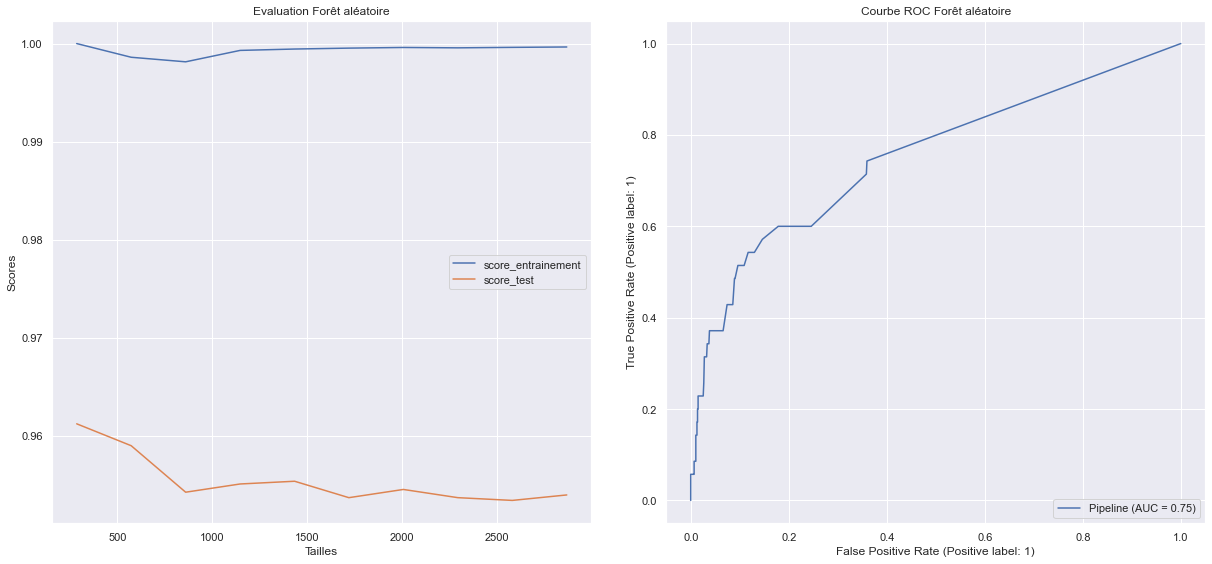

In [74]:
nom, modele = next(generateur_modeles)

<h3 align="center" class="alert alert-warning">Adaboost</h3>

---------------
Pour le modèle Adaboost :
La precision du modèle : 0.9587513935340022
Matrice de confusion : 
[[860   2]
 [ 35   0]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       862
           1       0.00      0.00      0.00        35

    accuracy                           0.96       897
   macro avg       0.48      0.50      0.49       897
weighted avg       0.92      0.96      0.94       897



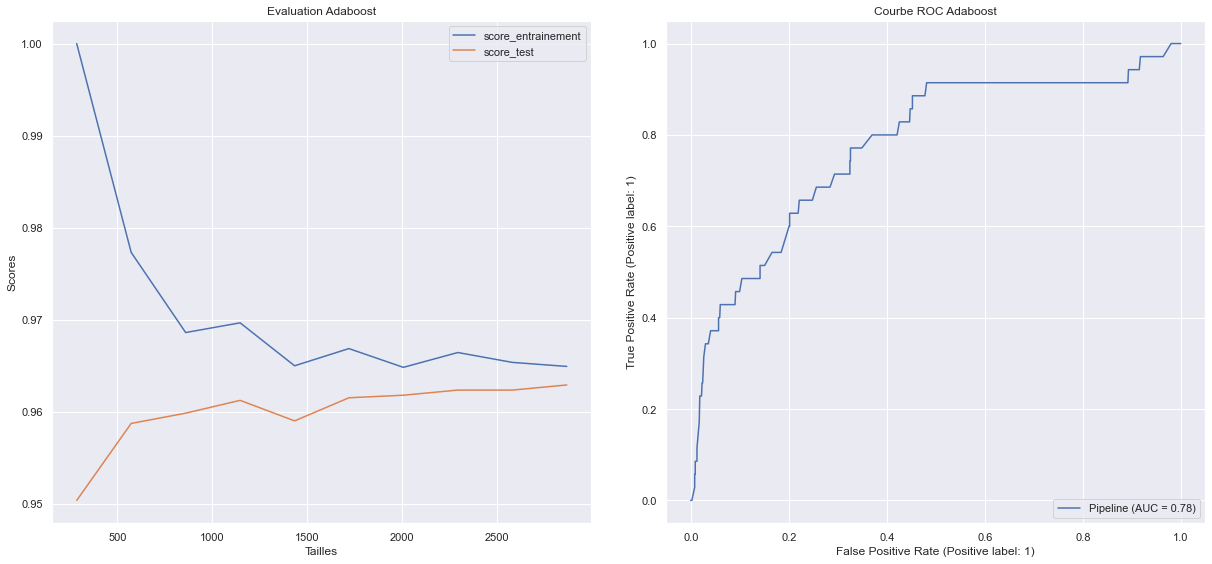

In [75]:
nom, modele = next(generateur_modeles)

<h3 align="center" class="alert alert-warning">SVC</h3>

---------------
Pour le modèle SVC :
La precision du modèle : 0.9609810479375697
Matrice de confusion : 
[[862   0]
 [ 35   0]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       862
           1       0.00      0.00      0.00        35

    accuracy                           0.96       897
   macro avg       0.48      0.50      0.49       897
weighted avg       0.92      0.96      0.94       897



C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



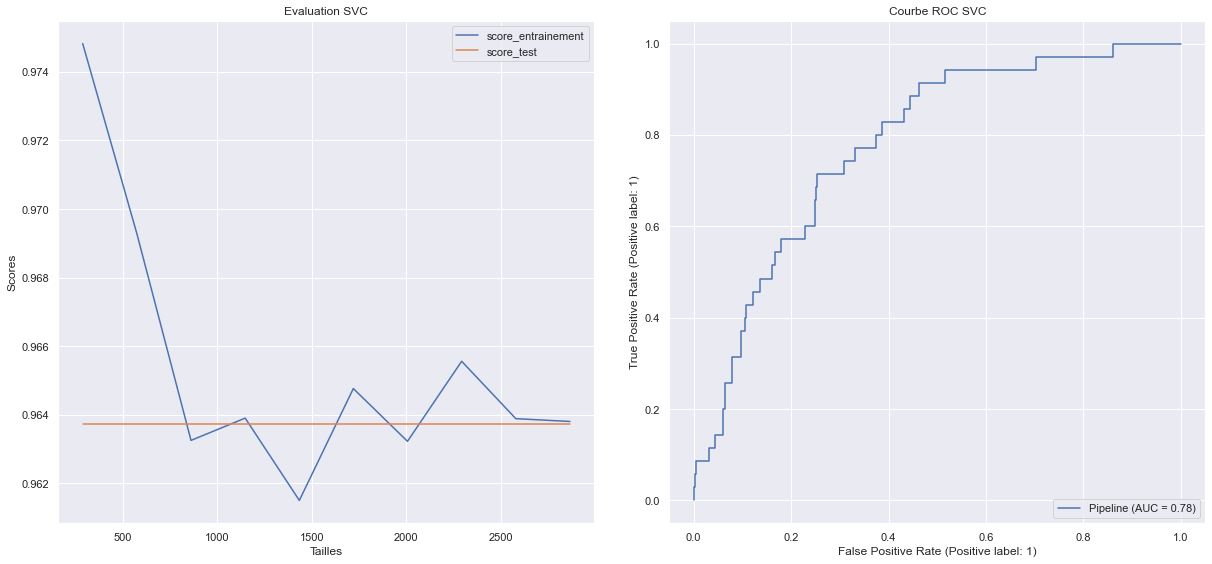

In [76]:
nom, modele = next(generateur_modeles)

<h3 align="center" class="alert alert-warning">KNN</h3>

---------------
Pour le modèle KNN :
La precision du modèle : 0.9609810479375697
Matrice de confusion : 
[[861   1]
 [ 34   1]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       862
           1       0.50      0.03      0.05        35

    accuracy                           0.96       897
   macro avg       0.73      0.51      0.52       897
weighted avg       0.94      0.96      0.94       897



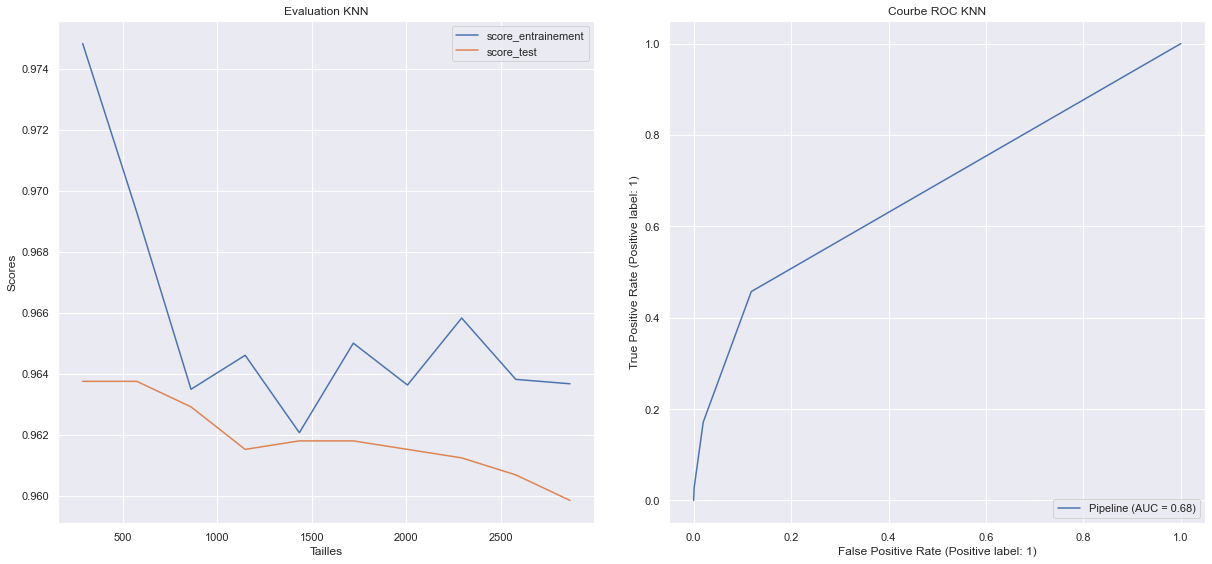

In [77]:
nom, modele = next(generateur_modeles)

<h3 align="center" class="alert alert-warning">LOGISTIC</h3>

---------------
Pour le modèle Logistic :
La precision du modèle : 0.9609810479375697
Matrice de confusion : 
[[862   0]
 [ 35   0]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       862
           1       0.00      0.00      0.00        35

    accuracy                           0.96       897
   macro avg       0.48      0.50      0.49       897
weighted avg       0.92      0.96      0.94       897



C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Papa Ba GAYE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



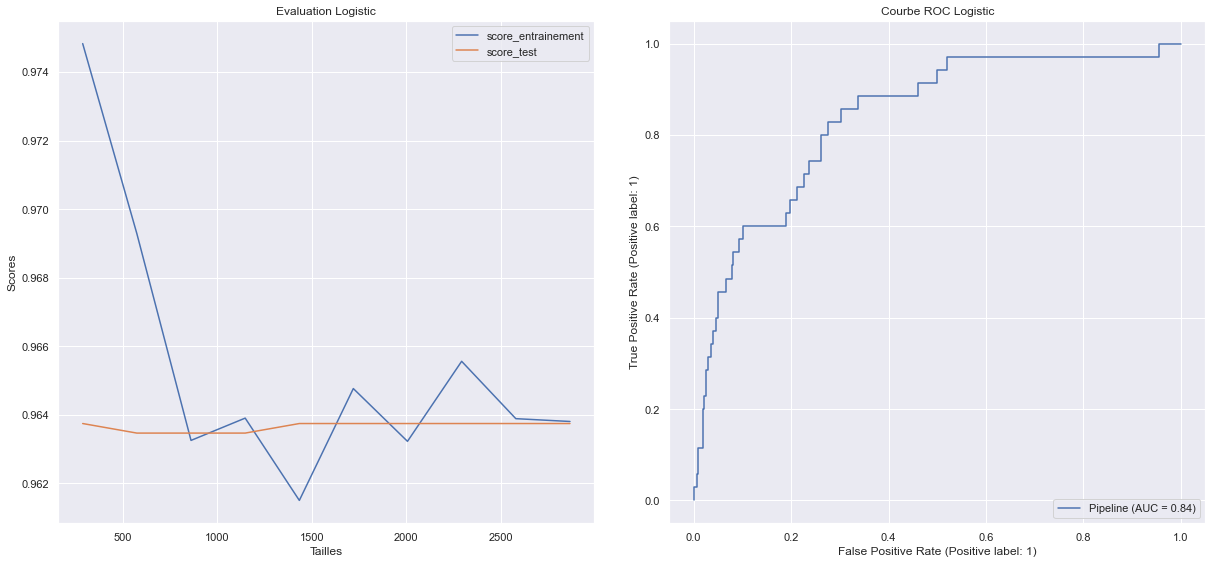

In [78]:
nom, modele = next(generateur_modeles)

<p style="font-family:'Times New Roman'">Le meilleur modèle est donc la <strong>régression logistique</strong> avec une aire sous la courbe de <strong>84%</strong>.</p>

<h2 align="center" class="alert alert-success">Description du modèle choisi</h2>

<h3 align="center" class="alert alert-warning">C'est quoi la régression logistique ?</h3>

<div align="justify" style = "font-family:'Times New Roman'">
<p>La régression logistique est une méthode qui permet de modéliser des variables binomiales (typiquement binaires), multinomiales (variables qualitatives à plus de deux modalités) ou ordinales (variables qualitatives dont les modalités sont ordonnées). Elle est très utilisée dans le domaine médical (guérison ou non d'un patient), en sociologie, en épidémiologie, en marketing quantitatif (achat ou non de produits ou services suite à une action) et en finance pour la modélisation de risques (scoring).</p>
<p>Le principe du modèle de la régression logistique est d'expliquer la survenance ou non d'un événement (la variable cible que nous noterons y) par le niveau de variables explicatives (notées X). Dans notre exemple, on cherche à prédire la sortie de la variable y (patient atteint d'AVC ou pas) en fonction des données relevées sur les patients.</p>
</div>

<h3 align="center" class="alert alert-warning">Comment fonctionne la régression logistique ?</h3>

<div align="justify" style = "font-family:'Times New Roman'">
<p>La régression logistique et la régression linéaire appartiennent à la même famille des modèles GLM (<span style = "color:blue"><i>Generalized Linear Models</i></span>) : dans les deux cas, on relie un événement à une combinaison linéaire de variables explicatives.</p>
<p>Dans le cas de la régression linéaire ordinaire, la variable dédendante Y suit une loi normale $N(\mu, \sigma)$ où $\mu$ est une fonction linéaire des variables explicatives. Pour la régression logistique binomiale, la variable dépendante, aussi appelée variable réponse, suit une loi de Bernoulli de paramètre p (p étant la probabilité pour que l'événement se produise), lorsque l'expérience est répétée une fois, ou une loi Binomiale(n, p) si l'expérience est répétée n fois (par exemple la même dose est essayée sur n patients). Dans le cas de la régression logistique, le paramètre de probabilité p est une fonction combinaison linéaire des variables explicatives X.
<p>Le cas <span style = "color:blue"><i>"binaire"</i></span> est le cas où la variable réponse peut prendre 2 valeurs (correspondant à un tirage de Bernoulli), et le cas <span style = "color:blue"><i>"somme de binaires"</i></span> le cas où la variable réponse est le comptage du nombre de fois où l'événement d'intérêt s'est produit.
<p>Les fonctions les plus couramment utilisées pour relier la probabilité p aux variables explicatives sont la fonction logistique (on parle alors de modèles <span style = "color:darkviolet"><i>Logit</i></span>) et la fonction de répartition de la loi normale standard (on parle alors de modèle <span style = "color:darkcyan"><i>Probit</i></span>). Ces deux fonctions sont parfaitement symétriques et sigmoïdes (La courbe en S représentée par la fonction $f_\lambda(x) = f(\lambda x) = \frac{1}{1+e^{-\lambda x}}$). La fonction sigmoide à la particularité d'être toujours comprise entre 0 et 1. Ainsi pour un seuil fixé entre 0 et 1 (la plupart du temps un seuil de 0.5) si le résultat de la fonction sigmoide, suivant les valeurs en entrées, est supérieur ou égale au seuil, alors on considère que l'individu est de classe 1 et sinon on considère qu'il est de classe 0. Dans le cas du dépistage de cancer du poumon on considérera ainsi que si les données d'un patient conduisent à la classe 1 alors il atteint de cancer et sinon il n'est pas atteint. A chaque résultat on attribue une probabilité qui indique son taux de certitude.
</div>


<h3 align="center" class="alert alert-warning">Les paramètres du modèle</h3>

<p style="font-family:'Times New Roman'">Affichage des paramètres du modèle.</p>

In [79]:
modele.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002EA678226A0>)])),
  ('logisticregression', LogisticRegression(random_state=4))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler()),
                                                  ('polynomialfeatures',
                                                   PolynomialFeatures())]),
                                  <sklea

<div align="justify" style = "font-family:'Times New Roman'">
    <ul>
        <li><strong>penalty (pénalité)</strong> : Ce paramètre est utilisé pour spécifier la norme (L1 ou L2) utilisée dans la pénalisation (régularisation). Il peut prendre les valeurs : 'L1', 'L2', 'elasticnet' ou none (aucun).</li>
        <li><strong>dual (double)</strong> : Il est utilisé pour la formulation double ou primale. La formulation double n’est mise en œuvre que pour la pénalité L2. Il prend des valeurs booléennes. </li>
        <li><strong>tol (tolérance)</strong> : Il représente la tolérance pour les critères d’arrêt.</li>
        <li><strong>C</strong> : Il représente l’inverse de la force de régularisation. Il doit toujours être un décimale positif.</li>
        <li><strong>fit_intercept</strong> : Ce paramètre spécifie si une constante (biais ou interception) doit être ajoutée à la fonction de décision. Il prend des valeurs booléennes.</li>
        <li><strong>intercept_scaling</strong> : Ce paramètre est utile lorsque le solveur 'liblinear' est utilisé ou que 'fit_intercept' est défini sur vraie. Il prend des valeurs décimales.</li>
        <li><strong>class_weight</strong> : Il représente les poids associés aux classes. Si nous utilisons l’option par défaut ('none' qui veut dire aucun), cela signifie que toutes les classes sont censées avoir un poids égale à 1. D’autre part, si vous choisissez la valeur 'équilibré', il utilisera les valeurs de y pour ajuster automatiquement les poids.</li>
        <li><strong>random_state</strong> : Ce paramètre représente la graine du nombre pseudo aléatoire généré qui est utilisé lors du brassage des données. Voici les options -
            <ul>
                <li><strong>int (entier)</strong> : dans ce cas, random_state est la graine utilisée par le générateur de nombres aléatoires.</li>
                <li><strong>'Instance RandomState'</strong> : dans ce cas, random_state est le générateur de nombres aléatoires.</li>
                <li><strong>Aucun</strong> : dans ce cas, le générateur de nombres aléatoires est l’instance RandonState utilisée par np.random.</li>
            </ul>
        </li>
        <li><strong>solver (solveur)</strong> : Ce paramètre représente l’algorithme à utiliser dans le problème d’optimisation. Voici les propriétés des options sous ce paramètre -
            <ul>
                <li><strong>liblinear</strong> : C’est un bon choix pour les petits ensembles de données. Il gère également la pénalité L1. Pour les problèmes multiclasses, il est limité aux schémas à un contre repos.</li>
                <li><strong>newton-cg</strong> : Il ne gère que la pénalité L2.</li>
                <li><strong>lbfgs</strong> : Pour les problèmes multiclasses, il gère la perte multinomiale. Il ne gère également que la pénalité L2.</li>
                <li><strong>saga</strong> : C’est un bon choix pour les grands ensembles de données. Pour les problèmes multiclasses, il gère également la perte multinomiale. En plus de la pénalité L1, il prend également en charge la pénalité « elasticnet ».</li>
                <li><strong>sag</strong> : Il est également utilisé pour les grands ensembles de données. Pour les problèmes multiclasses, il gère également la perte multinomiale.</li>
            </ul>
        </li>
        <li><strong>max_iter</strong> : Comme son nom l’indique, il représente le nombre maximal d’itérations prises pour que les solveurs convergent.</li>
        <li><strong>multi_class</strong> :
            <ul>
                <li><strong>ovr</strong> : Pour cette option, un problème binaire convient à chaque étiquette.</li>
                <li><strong>multimonial</strong> : Pour cette option, la perte minimisée est l’ajustement de la perte multinomiale sur l’ensemble de la distribution de probabilité. Nous ne pouvons pas utiliser cette option si solver = 'liblinear'.</li>
                <li><strong>auto</strong> : Cette option sélectionnera 'ovr' si solver = 'liblinear' ou si les données sont binaires, sinon il choisira 'multinomial'.</li>
            </ul>
        </li>
        <li><strong>verbose</strong> : Par défaut, la valeur de ce paramètre est 0, mais pour le solveur liblinear et lbfgs, nous devons définir verbose sur n’importe quel nombre positif.</li>
        <li><strong>warm_start</strong> : Avec ce paramètre défini sur True, nous pouvons réutiliser la solution de l’appel précédent pour l’adapter en tant qu’initialisation. Si nous choisissons la valeur par défaut, c’est-à-dire faux, cela effacera la solution précédente.</li>
        <li><strong>n_jobs</strong> : Si multi_class = 'ovr', ce paramètre représente le nombre de cœurs de CPU utilisés lors de la parallélisation sur les classes. Il est ignoré lorsque solver = 'liblinear'.</li>
        <li><strong>l1_ratio</strong> : Il est utilisé dans le cas où penalty = 'elasticnet'. Il s’agit essentiellement du paramètre de mélange Elastic-Net avec 0 < = l1_ratio > = 1.</li>
    </ul>
</div>

<p style="font-family:'Times New Roman'">Nous utiliserons certaines de ces paramètres pour optimiser le modèle.</p>

<h2 align="center" class="alert alert-success">Optimisation de la performance du modèle</h2>

In [80]:
cv = StratifiedKFold(5)

<p style="font-family:'Times New Roman'">Optimisons la performance du modèle avec RandomizedSearchCV.</p>

In [81]:
params = {
    "columntransformer__pipeline__polynomialfeatures__degree" : np.arange(2, 11),
    "logisticregression__C": np.linspace(1, 5, 20),
    "logisticregression__dual": [True, False],
    "logisticregression__fit_intercept": [True, False],
    "logisticregression__penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "logisticregression__solver": ["lbfgs", "saga"]
}

In [82]:
import warnings
warnings.filterwarnings('ignore')
grid = RandomizedSearchCV(modele, params, n_iter = 20, scoring = "f1", cv = cv, random_state = 21)
grid.fit(X_train, y_train)
grid.best_params_

{'logisticregression__solver': 'saga',
 'logisticregression__penalty': 'none',
 'logisticregression__fit_intercept': False,
 'logisticregression__dual': False,
 'logisticregression__C': 3.7368421052631575,
 'columntransformer__pipeline__polynomialfeatures__degree': 2}

In [83]:
modele = grid.best_estimator_

La precision du modèle : 0.9609810479375697
Matrice de confusion : 
[[862   0]
 [ 35   0]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       862
           1       0.00      0.00      0.00        35

    accuracy                           0.96       897
   macro avg       0.48      0.50      0.49       897
weighted avg       0.92      0.96      0.94       897



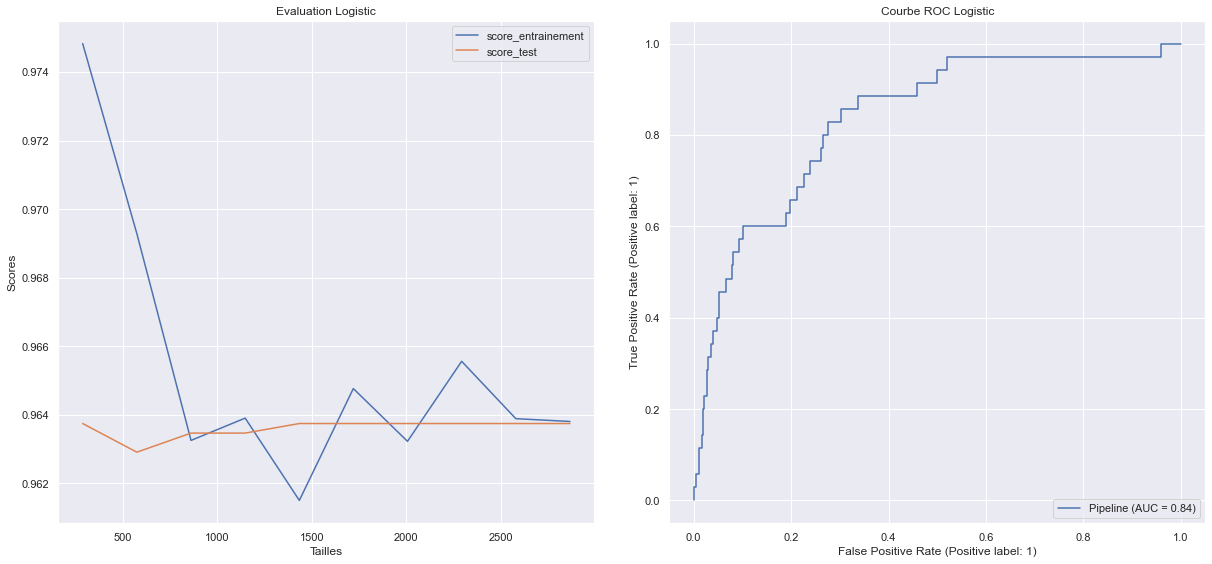

In [84]:
selection_modele.evaluation(modele, "Logistic", X_train, X_test, y_train, y_test)

<h2 align="center" class="alert alert-success">Compromis entre Sensibilité et Précision</h2>

<p style="font-family:'Times New Roman'">Tracons la courbe de Precision-Recall pour vérifier quel seuil nous permet d'obtenir une assez bonne sensibilité sans pour autant trop diminué la précision.</p>

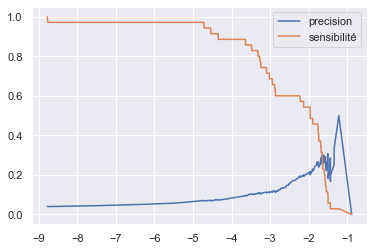

In [85]:
selection_modele.courbe_sensibilite_precision(modele, X_test, y_test)

<p style="font-family:'Times New Roman'">Nous pouvons choisir un seuil de -4.7 pour obtenir une bonne sensibilité et diminuer la précision à l'inverse.</p>

<h2 align="center" class="alert alert-success">Conception du modèle final</h2>

In [86]:
def modele_finale(modele, X, seuil = 0):
    """Modèle de prédiction basé sur le modèle fourni en paramètre.
    Args:
        modele (pipeline): Le modèle choisi
        X (pandas.DataFrame ou Autres): les données à prédire
        seuil (float): Le seuil de prédiction
    """
    return modele.decision_function(X) > seuil

<p style="font-family:'Times New Roman'"><strong>Prédiction et calcul de la sensibilité.</strong></p>

<p style="font-family:'Times New Roman'">Prédiction</p>

In [87]:
# Pour un seuil de -4.7
y_pred = modele_finale(modele, X_test, seuil = -4.7)

<p style="font-family:'Times New Roman'">Calcul de la sensibilité</p>

In [88]:
recall_score(y_test, y_pred).round(3)

0.943

<p style="font-family:'Times New Roman'">Nous obtenons ainsi une sensibilité finale tournant autour de <strong>94%</strong></p>